In [4]:
# Import libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import sklearn
from sklearn import metrics 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import scipy.stats
from scipy.stats import shapiro

# need to find out how to use XGBoost

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [15]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/merged_sentiment_copy.csv'
df_uk_full = pd.read_csv(url)  

df_uk_full

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
0,01-12-89,2661.760010,803.789978,14.713333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,01-01-90,2591.129883,783.250000,14.630000,5.7,1165.829956,725.320007,NaN,NaN,-19.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
2,01-02-90,2463.879883,746.010010,14.546667,5.9,1121.469971,700.580017,NaN,NaN,-24.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
3,01-03-90,2437.370117,741.700012,14.463333,6.0,1115.699951,701.400024,NaN,NaN,-35.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
4,01-04-90,2285.780029,701.510010,14.380000,6.4,1044.619995,660.010010,NaN,NaN,-31.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,01-12-24,20622.605250,18346.656780,4.666667,2.5,4510.612374,9911.349295,97.599004,202.318,-17.0,76.436604,258.074,70.333738,1158.944,4.4,6.0,0.1,NaN
425,01-01-25,20950.482850,18672.852080,4.583333,3.0,4760.296255,10468.532720,97.964750,203.450,-22.0,77.157249,260.303,70.983754,1169.039,4.4,5.6,0.1,NaN
426,01-02-25,20326.383590,18140.063380,4.500000,2.8,4808.022992,10614.288820,97.931114,204.230,-20.0,77.946072,262.794,71.900830,1181.575,4.4,5.6,0.1,NaN
427,01-03-25,19475.479520,17424.441290,4.500000,2.6,4675.031137,10374.199300,98.206564,204.810,-19.0,76.341361,258.271,69.708409,1153.159,4.4,5.6,0.1,NaN


In [17]:
df_uk_full.describe()

,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
count,429.000000,429.000000,429.000000,428.000000,428.000000,428.000000,327.000000,327.000000,428.000000,327.000000,327.000000,345.000000,345.000000,428.000000,293.000000,429.000000,294.000000
mean,10618.089403,7088.524507,3.895254,2.741589,2898.553707,4074.876157,102.199686,165.608471,-12.196262,116.558976,233.210150,119.766901,1072.605623,6.202804,3.380546,0.498368,0.071241
std,6486.845572,5765.988797,3.433704,2.147064,963.999754,2551.074231,2.019057,28.512795,12.157390,16.419084,91.571367,20.393053,495.807034,1.857170,1.960185,2.497648,0.162852
min,1974.040039,618.229981,0.175000,-0.100000,968.719971,626.700012,96.086395,100.000000,-49.000000,74.537811,100.000000,69.708409,343.756000,3.600000,-2.900000,-20.300000,-0.485326
25%,4811.399902,2127.800049,0.426966,1.500000,2181.337488,2134.199993,101.393485,141.963000,-21.000000,108.945661,149.728500,108.732895,636.799000,4.800000,2.000000,0.300000,-0.000799
50%,9306.890000,5232.980000,4.500000,2.200000,2996.230000,3465.360000,102.760895,181.923000,-10.000000,117.472840,244.103000,119.794840,943.254000,5.500000,3.200000,0.500000,0.062303
75%,17168.343780,12172.659480,5.730000,3.000000,3666.856365,5929.765691,103.605045,186.355000,-3.000000,126.876200,299.265500,133.330400,1412.945000,7.800000,4.700000,0.800000,0.176186
max,24102.191970,19395.493530,14.713333,11.100000,4808.022992,10614.288820,105.672380,206.139000,10.000000,152.680969,423.925000,168.403976,2192.415000,10.700000,8.900000,16.800000,0.514315


In [19]:
df_uk_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     429 non-null    object 
 1   ftse_250_price                           429 non-null    float64
 2   ftse_250_total_return                    429 non-null    float64
 3   base_rate                                429 non-null    float64
 4   CPI                                      428 non-null    float64
 5   ftse_350_Price                           428 non-null    float64
 6   ftse_350_Total Return (Gross, Unhedged)  428 non-null    float64
 7   price_02_Price                           327 non-null    float64
 8   price_02_Total Return (Gross, Unhedged)  327 non-null    float64
 9   confidence_score                         428 non-null    float64
 10  price_05_Price                           327 non-n

In [21]:
# Convert date to datetime

df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)

# This is the additional data format change code, If only run the above code, getting an error
df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], format='%d/%m/%Y', errors='coerce')


# Define the start and end dates
start_date = '1998-01-01'
end_date = '2022-12-31'

# Create a new dataframe by filtering the original dataframe
df_uk_1998_2022 = df_uk_full[(df_uk_full['Date'] >= start_date) & (df_uk_full['Date'] <= end_date)].copy()

#Check if the data types are right 
#df_uk_2008_2012.dtypes
df_uk_1998_2022.head()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_28396\217074686.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)


,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
97,1998-01-01,4861.479980,2060.850098,7.321429,1.5,2602.879883,2297.689941,NaN,NaN,4.0,NaN,NaN,123.35627,426.341,6.4,NaN,0.7,NaN
98,1998-02-01,5201.000000,2206.389893,7.357143,1.6,2756.439941,2437.030029,NaN,NaN,4.0,NaN,NaN,122.77834,427.959,6.4,NaN,0.7,NaN
99,1998-03-01,5525.430176,2353.889893,7.392857,1.7,2852.290039,2536.939941,NaN,NaN,2.0,NaN,NaN,125.44400,439.238,6.3,NaN,0.6,NaN
100,1998-04-01,5610.799805,2397.669922,7.428571,1.8,2859.120117,2548.239990,NaN,NaN,4.0,NaN,NaN,126.15500,442.946,6.3,NaN,0.6,NaN
101,1998-05-01,5901.410156,2525.439941,7.464286,2.0,2864.489990,2557.080078,NaN,NaN,7.0,NaN,NaN,127.17800,450.842,6.3,NaN,0.6,NaN


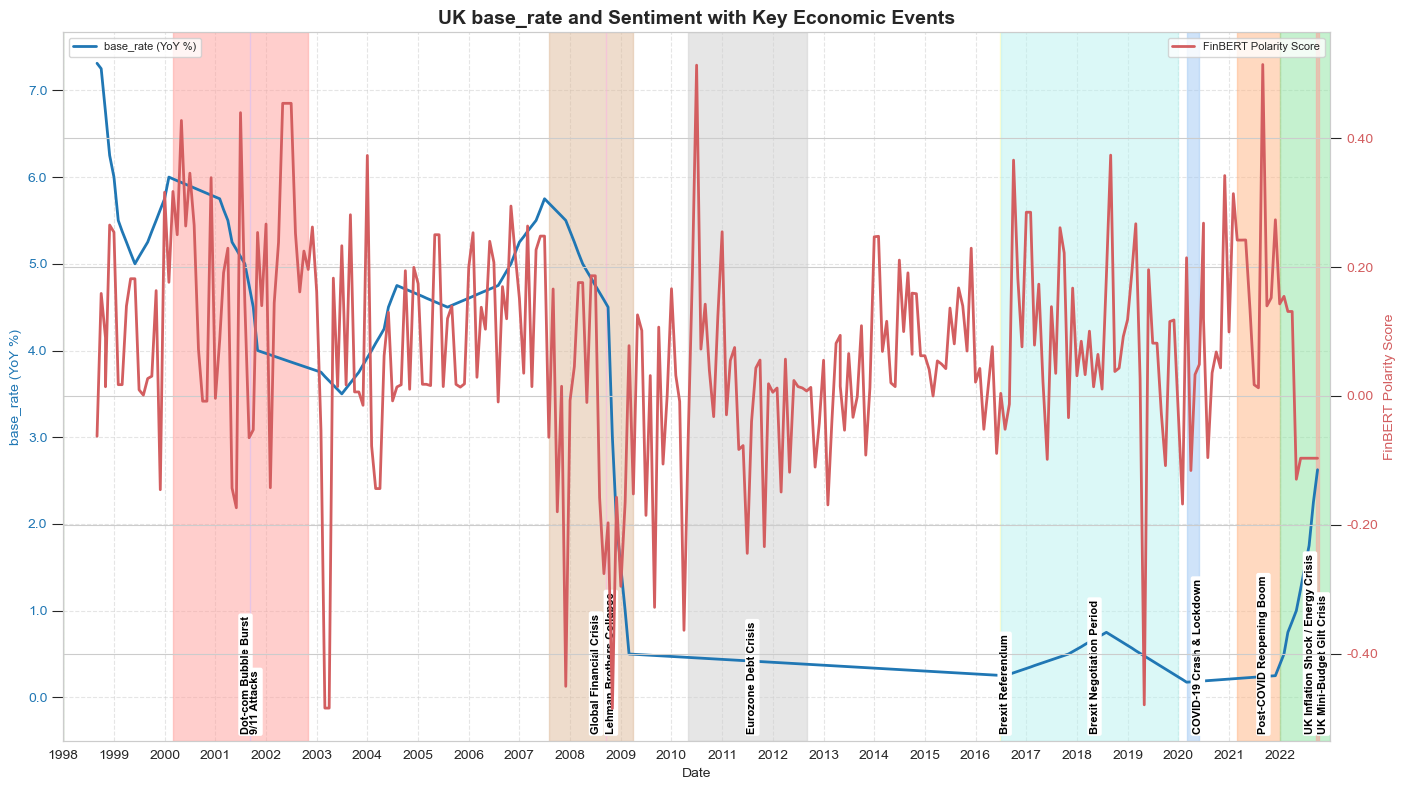

In [23]:
# Filter data from 1 Jan 2008 onwards
start_date = pd.to_datetime('1998-01-01')
end_date = pd.to_datetime('2022-12-31')
df_plot = df_uk_1998_2022[
    (df_uk_1998_2022['Date'] >= start_date) & (df_uk_1998_2022['Date'] <= end_date)
].copy()
df_plot = df_plot.dropna(subset=['base_rate', 'polarity_score_finbert'])

# Define the key economic events dictionary
events = {
    'Early 1990s Recession (UK)': {'Start': '1990-07-01', 'End': '1992-09-30'},
    'Black Wednesday (ERM Crisis)': {'Start': '1992-09-16', 'End': '1992-09-16'},
    'BoE Operational Independence': {'Start': '1997-05-06', 'End': '1997-05-06'},
    'Dot-com Bubble Burst': {'Start': '2000-03-01', 'End': '2002-10-31'},
    '9/11 Attacks': {'Start': '2001-09-11', 'End': '2001-09-11'},
    'Global Financial Crisis (GFC)': {'Start': '2007-08-01', 'End': '2009-03-31'},
    'Lehman Brothers Collapse': {'Start': '2008-09-15', 'End': '2008-09-15'},
    'Eurozone Debt Crisis': {'Start': '2010-05-01', 'End': '2012-08-31'},
    'Brexit Referendum': {'Start': '2016-06-23', 'End': '2016-06-23'},
    'Brexit Negotiation Period': {'Start': '2016-07-01', 'End': '2019-12-31'},
    'COVID-19 Crash & Lockdown': {'Start': '2020-03-01', 'End': '2020-05-31'},
    'Post-COVID Reopening Boom': {'Start': '2021-03-01', 'End': '2021-12-31'},
    'UK Inflation Shock / Energy Crisis': {'Start': '2022-01-01', 'End': '2022-12-31'},
    'UK Mini-Budget Gilt Crisis': {'Start': '2022-09-23', 'End': '2022-10-14'}
}

# Apply a Seaborn style
sns.set_style('whitegrid')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# --- CPI Plot ---
color_base_rate = '#2077b4'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('base_rate (YoY %)', color=color_base_rate, fontsize=10)
ax1.plot(df_plot['Date'], df_plot['base_rate'], color=color_base_rate, label='base_rate (YoY %)', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_base_rate, size=8)

# --- Sentiment Score Plot ---
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot['Date'], df_plot['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# --- Event Shading and Labels ---
# Use a Seaborn palette for event colors
event_colors = sns.color_palette('pastel', n_colors=len(events)).as_hex()
label_y_offset = 0.01
label_fontsize = 8
i = 0

label_positions = {}
brexit_referendum_end = pd.to_datetime(events['Brexit Referendum']['End'])
label_positions['Brexit Referendum'] = brexit_referendum_end
label_positions['Brexit Negotiation Period'] = brexit_referendum_end + pd.Timedelta(days=150)

# Set the y position for the labels to be at the bottom of the chart (y=0)
event_y_position = 0

for event_name, dates in events.items():
    start = pd.to_datetime(dates['Start'])
    end = pd.to_datetime(dates['End'])

    # Skip events that start after the chart's end date
    if start > end_date:
        continue

    # Limit shaded region to chart range
    display_start = max(start, start_date)
    display_end = min(end, end_date)

    ax1.axvspan(display_start, display_end, color=event_colors[i % len(event_colors)], alpha=0.5)

    # Only add label if within visible range
    label_x_pos = display_start + (display_end - display_start) / 2
    if start_date <= label_x_pos <= end_date:
        ax1.text(label_x_pos, 0.01,
                 event_name.split('(')[0].strip(),
                 rotation=90,
                 fontsize=label_fontsize,
                 color='black',
                 fontweight='bold',
                 ha='left',
                 va='bottom',
                 transform=ax1.get_xaxis_transform(),
                 zorder=5,
                 bbox=dict(
                     facecolor='white',
                     alpha=1,
                     edgecolor='none',
                     boxstyle='round,pad=0.2'))

    i += 1

# --- Title and Layout ---
plt.title('UK base_rate and Sentiment with Key Economic Events', fontsize=14, fontweight='bold')
fig.tight_layout()

# --- X-Axis Formatting ---
ax1.xaxis.set_major_locator(mdates.YearLocator(1)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# --- Y-Axis Formatting ---
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# --- Legends ---
ax1.legend(loc='upper left', fontsize=8)
ax2.legend(loc='upper right', fontsize=8)

# --- Grid and Limits ---
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, end_date)
ax1.set_ylim(bottom=-0.5)  # Ensure the y-axis starts at 0

plt.show()

### This chart suggests a strong relationship between economic shocks, sentiment trends, and central bank policy actions. FinBERT sentiment appears to be a useful early indicator of turning points or stress in the economic cycle.

### Visual analysis shows that BoE base rate Y-o-Y percentage change tends to move inversely to the finBERT sentiment scores. Also significant movements in both CPI and sentiment scores tend to take place where there are key economic events which directly impact on the UK economy (e.g. the Global Financial Crisis, Eurozone Debt Crisis, Brexit and Covid-19.

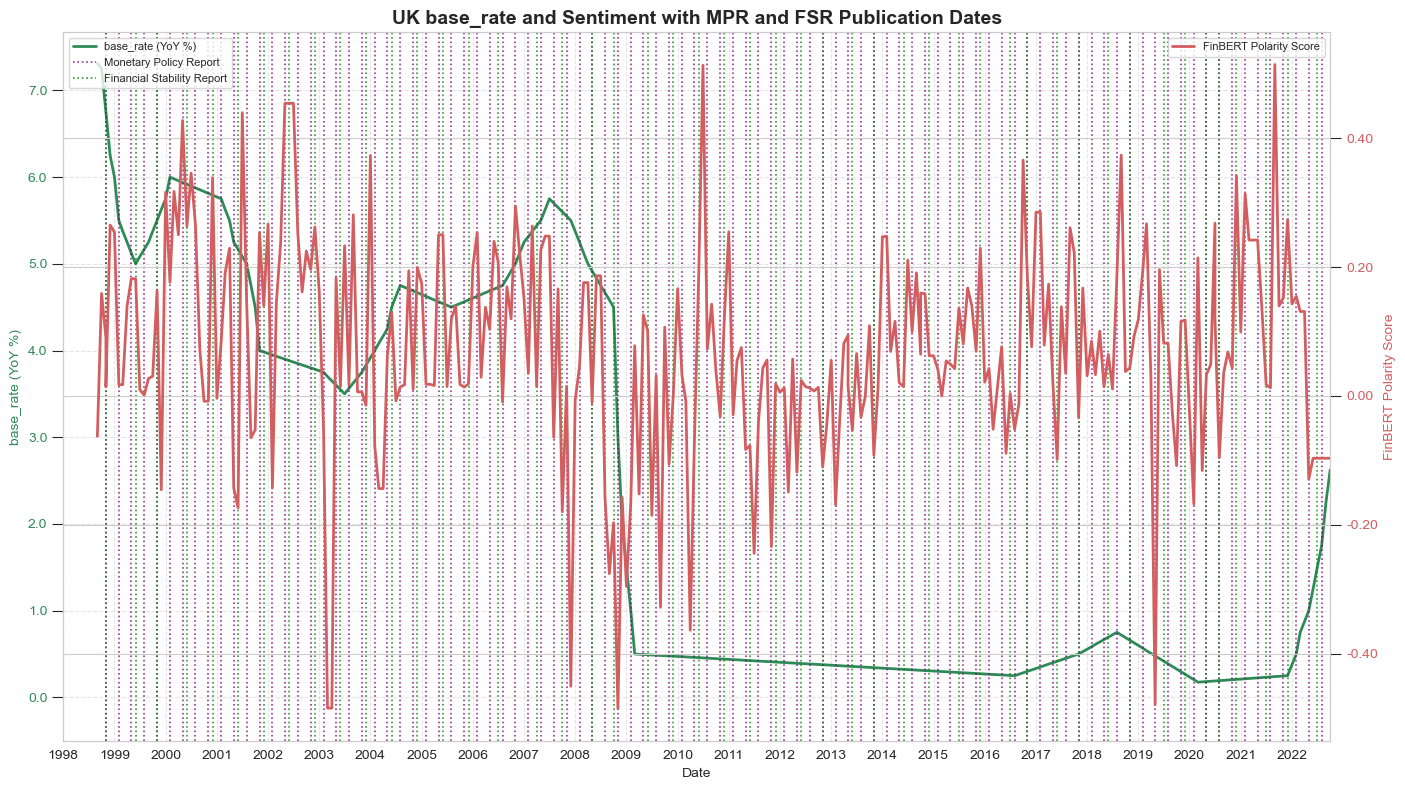

In [27]:

start_date = pd.to_datetime('1998-01-01')
df_plot2 = df_uk_1998_2022[df_uk_1998_2022['Date'] >= start_date].copy()
df_plot2 = df_plot2.dropna(subset=['base_rate', 'polarity_score_finbert'])

# --- Load Publication Dates from repo ---
mpr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/mpr_dates_cleaned.csv'
fsr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/fsr_dates_cleaned.csv'

mpr_dates = pd.read_csv(mpr_url, parse_dates=["date"])
fsr_dates = pd.read_csv(fsr_url, parse_dates=["date"])

# --- Apply Style ---
sns.set_style('whitegrid')

# --- Plot Setup ---
fig, ax1 = plt.subplots(figsize=(14, 8))

# base_rate Line (Left Axis)
color_base_rate = '#2E8B57'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('base_rate (YoY %)', color=color_base_rate, fontsize=10)
ax1.plot(df_plot2['Date'], df_plot2['base_rate'], color=color_base_rate, label='base_rate (YoY %)', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_base_rate, size=8)

# Sentiment Line (Right Axis)
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot2['Date'], df_plot2['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# --- NEW: Add MPR and FSR Vertical Lines ---

# MPR: Purple Dotted Lines
for date in mpr_dates['date']:
    ax1.axvline(x=date, color='purple', linestyle=':', linewidth=1.2, alpha=0.8, label='Monetary Policy Report')

# FSR: Green Dotted Lines
for date in fsr_dates['date']:
    ax1.axvline(x=date, color='green', linestyle=':', linewidth=1.2, alpha=0.8, label='Financial Stability Report')

# --- Title and Layout ---
plt.title('UK base_rate and Sentiment with MPR and FSR Publication Dates', fontsize=14, fontweight='bold')
fig.tight_layout()

# --- X-Axis Formatting ---
ax1.xaxis.set_major_locator(mdates.YearLocator(1)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# --- Y-Axis Formatting ---
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# --- Deduplicated Legend ---
handles, labels = ax1.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax1.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', fontsize=8)

# --- Legend for FinBERT on Right Axis ---
handles2, labels2 = ax2.get_legend_handles_labels()
unique_labels2 = dict(zip(labels2, handles2))
ax2.legend(unique_labels2.values(), unique_labels2.keys(), loc='upper right', fontsize=8)

# --- Grid and Limits ---
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot['Date'].max())
ax1.set_ylim(bottom=-0.5)

plt.show()

### Summary
### Interpretation:

* Rate-Sentiment Dynamics:
FinBERT sentiment could serve as a leading indicator for rate changes.

Prolonged negative sentiment appears to correlate with loose monetary policy.

* Communication Strategy:

MPR and FSR publication timing may reflect the BoE’s response strategy to market signals or crises.

* Potential Use Cases:

Modeling policy response using sentiment and timing of reports.

Forecasting interest rates based on real-time sentiment signals.

### Drop unncessary columns to reduce the number of variables to be explored

In [31]:
# Drop unnecessary columns. Alters the original "df_uk" dataframe to reflected dropped columns
df_uk_focused = df_uk_1998_2022.drop(['ftse_250_price', 'ftse_350_Price','ftse_350_Total Return (Gross, Unhedged)','price_02_Price', 'price_05_Price','price_05_Total Return (Gross, Unhedged)','price_10_Price','price_10_Total Return (Gross, Unhedged)'], axis=1)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'base_rate', 'CPI',
       'price_02_Total Return (Gross, Unhedged)', 'confidence_score',
       'unemployment_rate', 'wage_growth_rate', 'gdp_GDP',
       'polarity_score_finbert'],
      dtype='object')

### Rename columns

In [34]:
# Rename the column headers.
df_uk_focused.rename(columns={
    'base_rate': 'BoE_base_rate',
    'CPI': 'CPI_pct_change',
    'gdp_GDP': 'GDP_pct_change',
    'price_02_Total Return (Gross, Unhedged)': '0-2yr_gilts_TReturns',
    'polarity_score_finbert':'finbert_sentiment_score'
}, inplace=True)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'BoE_base_rate', 'CPI_pct_change',
       '0-2yr_gilts_TReturns', 'confidence_score', 'unemployment_rate',
       'wage_growth_rate', 'GDP_pct_change', 'finbert_sentiment_score'],
      dtype='object')

In [36]:
# Define the new order of the columns
new_column_order = [
    'Date', 'BoE_base_rate', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'CPI_pct_change', '0-2yr_gilts_TReturns'
]

# Reindex the DataFrame with the new column order
df_uk_focused = df_uk_focused[new_column_order]

df_uk_focused.head()

,Date,BoE_base_rate,finbert_sentiment_score,confidence_score,unemployment_rate,wage_growth_rate,GDP_pct_change,ftse_250_total_return,CPI_pct_change,0-2yr_gilts_TReturns
97,1998-01-01,7.321429,NaN,4.0,6.4,NaN,0.7,2060.850098,1.5,NaN
98,1998-02-01,7.357143,NaN,4.0,6.4,NaN,0.7,2206.389893,1.6,NaN
99,1998-03-01,7.392857,NaN,2.0,6.3,NaN,0.6,2353.889893,1.7,NaN
100,1998-04-01,7.428571,NaN,4.0,6.3,NaN,0.6,2397.669922,1.8,NaN
101,1998-05-01,7.464286,NaN,7.0,6.3,NaN,0.6,2525.439941,2.0,NaN


# Correlation analysis

### Create pairplot for visual correlation analysis

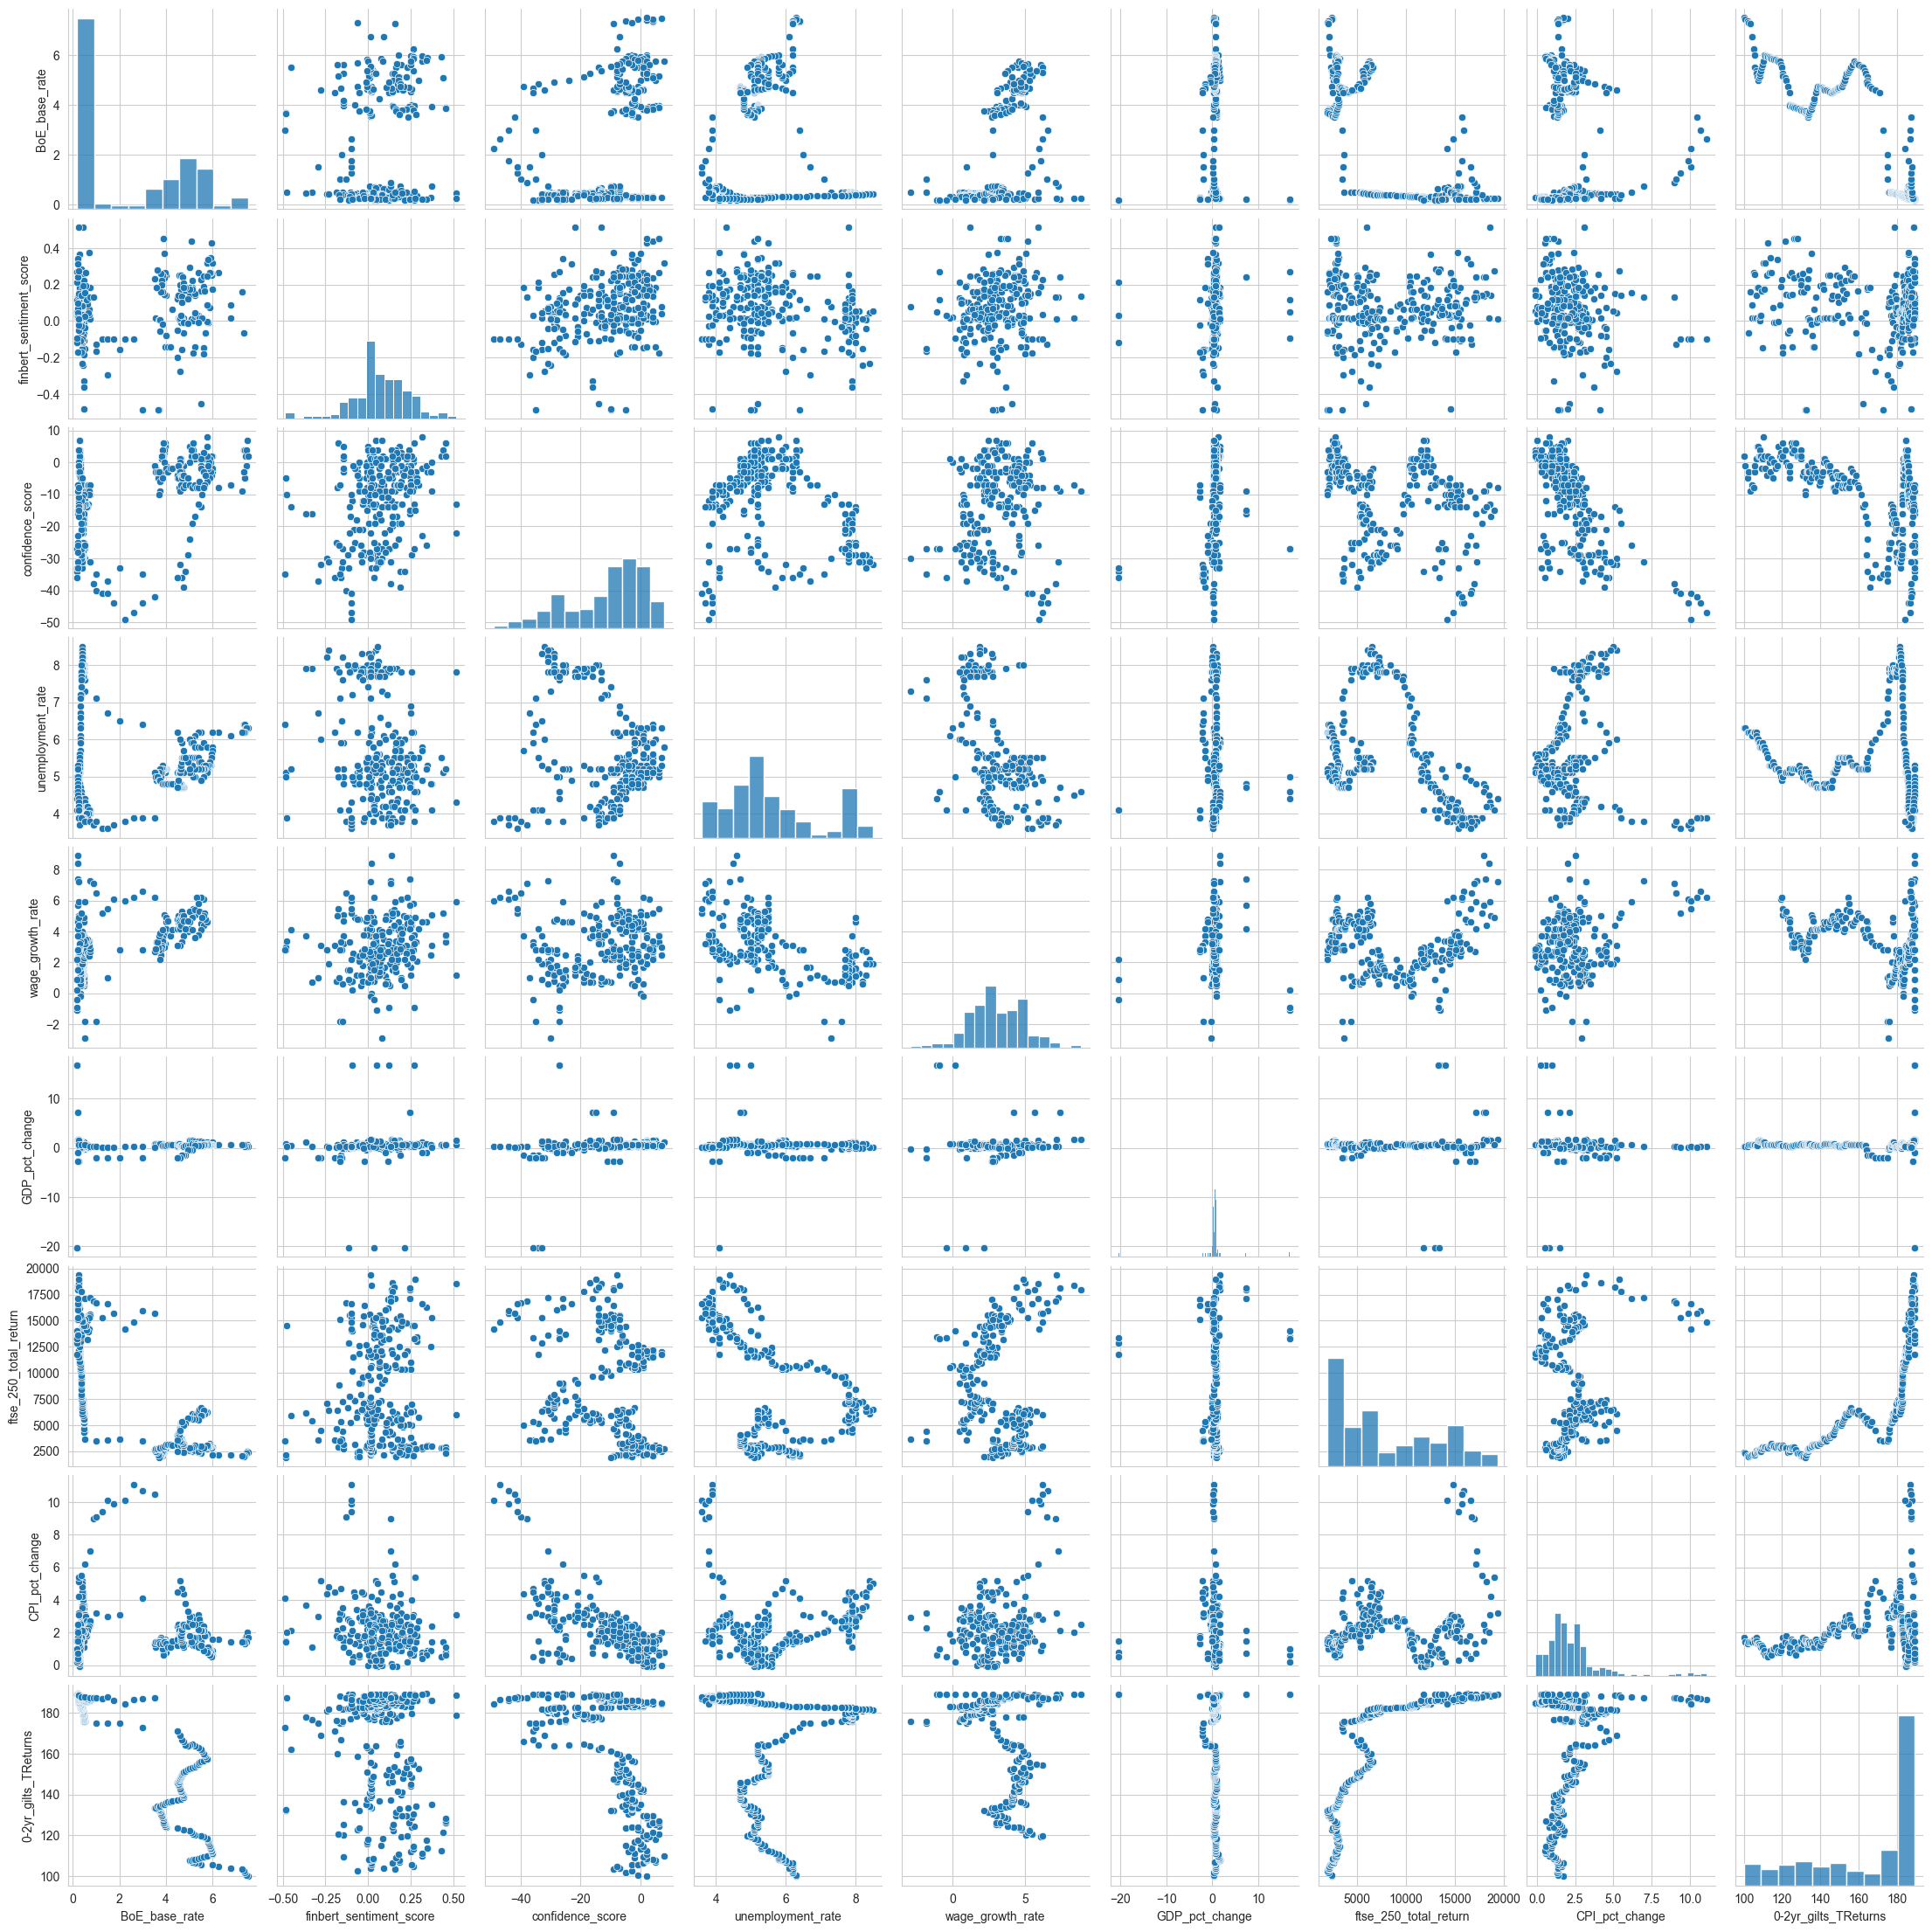

In [11]:
# Visualise the dataframe to pick out any direct relationships or specific distribution characteristics
sns.pairplot(df_uk_focused)

### Create correlation matrices

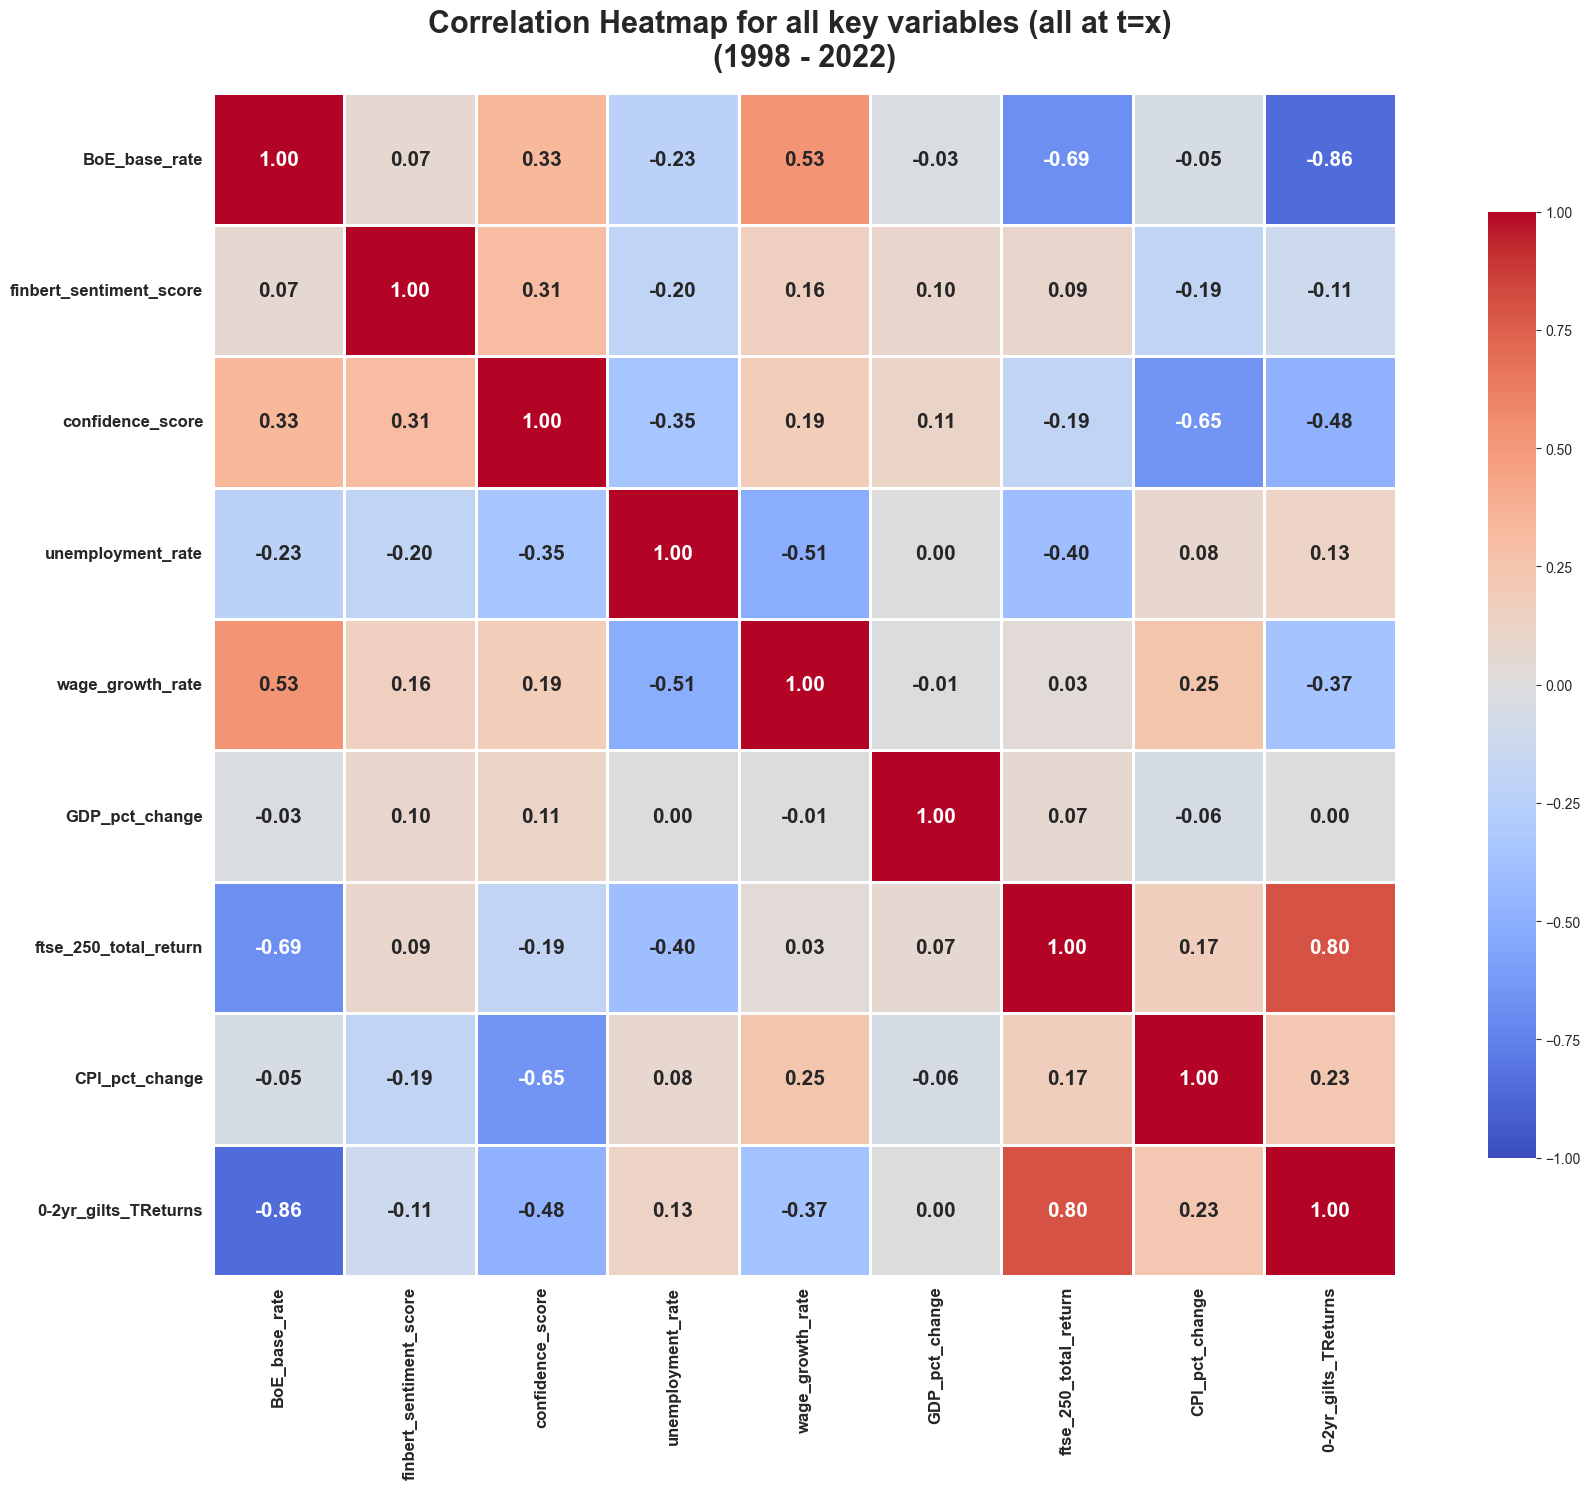

In [12]:
# Ensure 'Date' column is datetime
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'])
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], format='%d-%m-%y', errors='coerce')

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "1998-01-01"
end_date = "2022-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)]

# Select only numeric columns and drop rows with missing values
numeric_data = filtered_df.select_dtypes(include='number').dropna()

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 15, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)

plt.title('Correlation Heatmap for all key variables (all at t=x) \n(1998 - 2022)', 
          fontsize=22, fontweight='bold', pad=20)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

plt.show()

### Insights:

### Negatively correlated with:
### BoE_base_rate:

2-yr gilts total return: -0.86 → As interest rates rise, bond prices (returns) fall.

FTSE_250_total_return: -0.69 → Higher rates likely dampen equity returns.

### Positively correlated with:

wage_growth_rate: +0.53 → Rate hikes often occur during inflationary wage pressures.

confidence_score: +0.33

### FinBERT_sentiment_score:

Mild positive correlations with:

confidence_score: +0.31

wage_growth_rate: +0.16

Weak/no relationship with BoE_base_rate: +0.07

## confidence_score:
### Strongly negative correlation with:

CPI_pct_change: -0.65

2-yr gilts_TRReturns: -0.48

unemployment_rate: -0.35

### unemployment_rate:
### Strong negative correlation with:

wage_growth_rate: -0.51

confidence_score: -0.35

Logical: higher unemployment typically means lower wages and lower confidence.

## Asset Returns:
FTSE_250_total_return and 2-yr gilts_TRReturns: +0.80

Both represent market asset returns and move similarly.

### Both are negatively correlated with BoE_base_rate, as expected in interest-sensitive asset pricing.

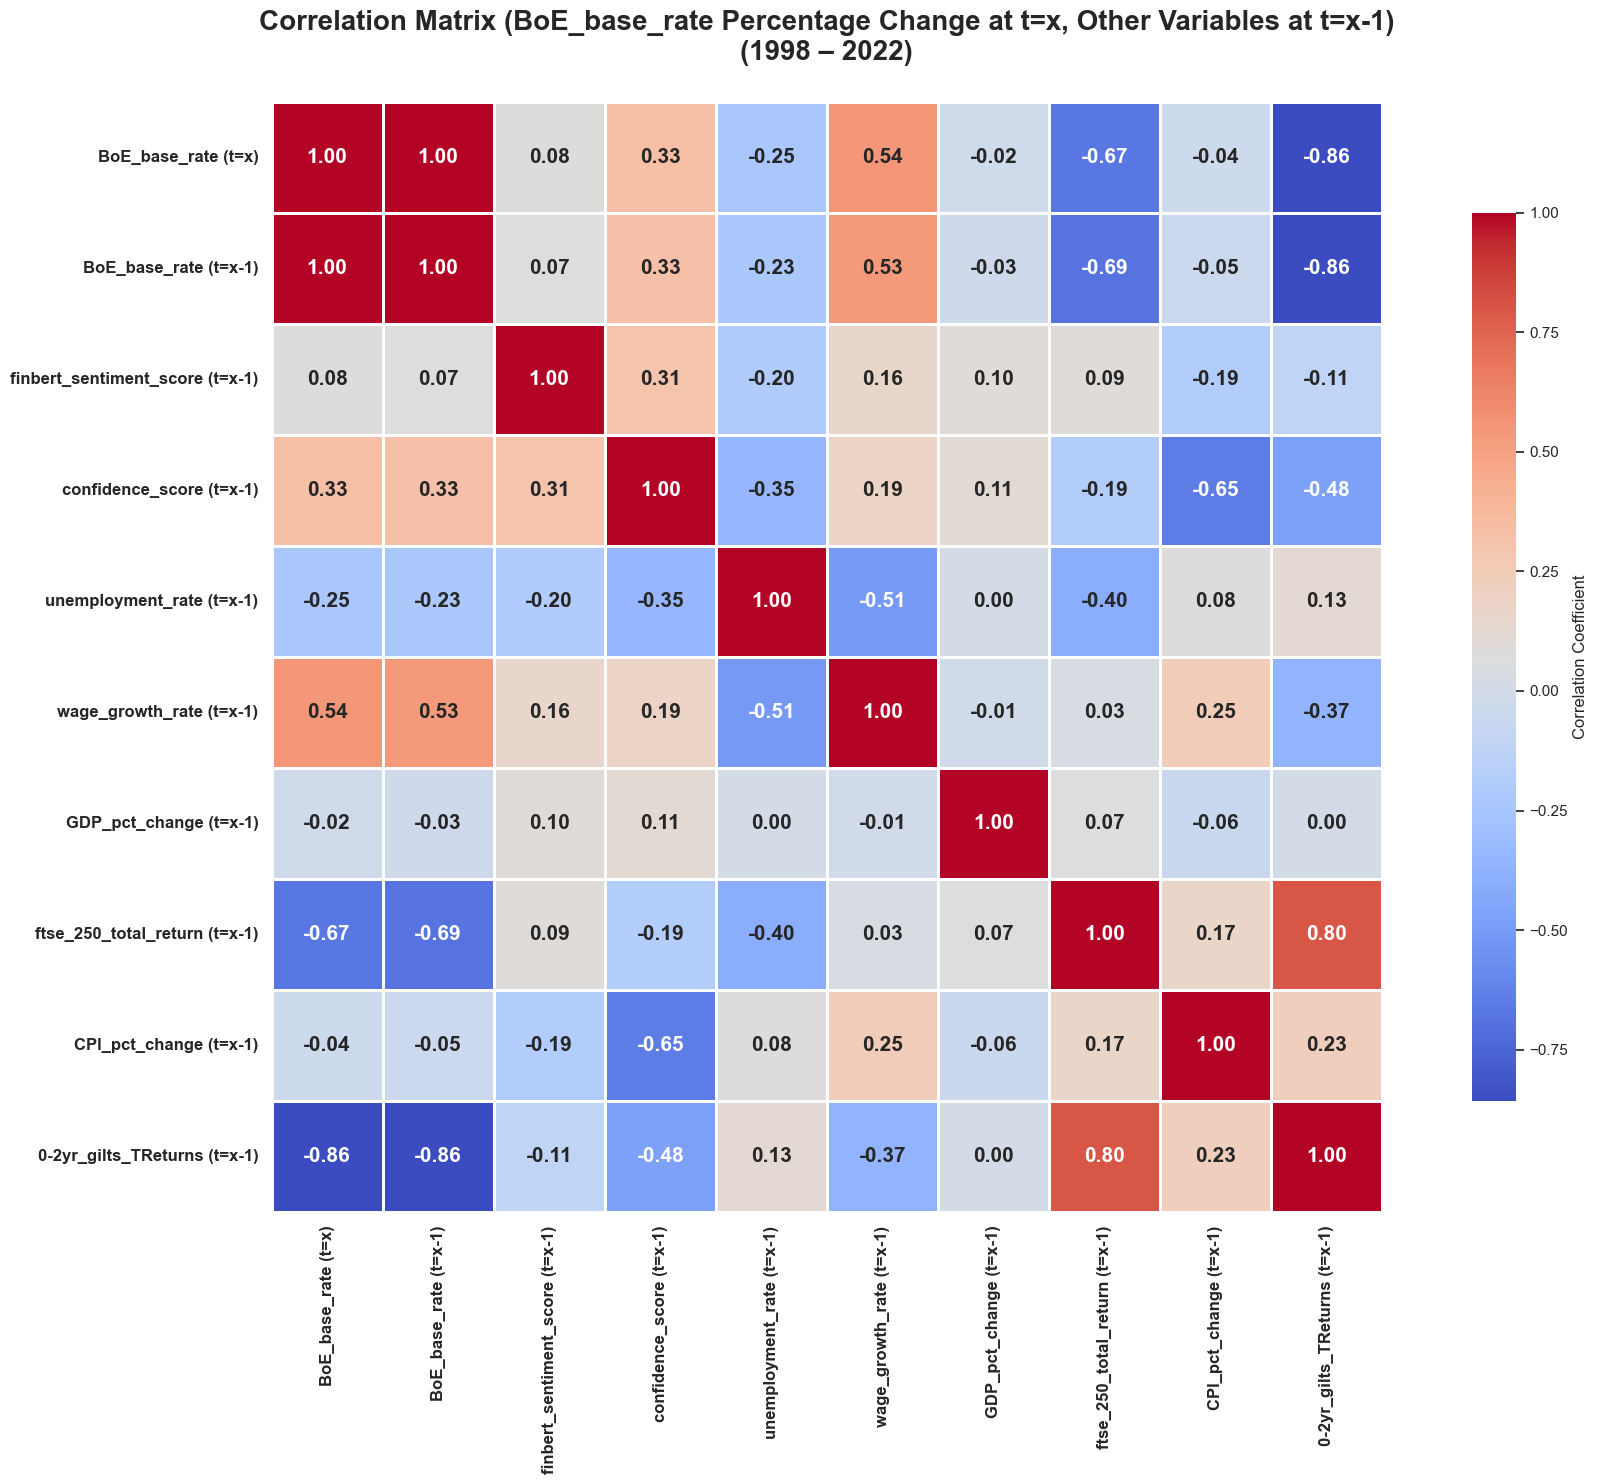

In [13]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/1998 – 12/2022
start_date = "1998-01-01"
end_date = "2022-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'BoE_base_rate', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'CPI_pct_change', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['BoE_base_rate']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'BoE_base_rate': 'BoE_base_rate (t=x)'}, inplace=True)

# Add t+1 (1 month lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-1)"] = filtered_df[col].shift(1)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (BoE_base_rate Percentage Change at t=x, Other Variables at t=x-1)\n(1998 – 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

### BoE Base Rate (t) and Prior Economic Indicators (t−1):

### 2-yr_gilts_TRReturns	-0.86	Strong negative relationship. Rising BoE rates tend to follow falling gilt prices (yields rising).

### ftse_250_total_return	-0.67	Negative link; stock market downturns may precede rate hikes (possibly inflation control).

### wage_growth_rate	+0.54	Strongest positive predictor. Suggests rate hikes often follow rising wages.

### confidence_score	+0.33	BoE might raise rates when confidence is high (economy doing well).

### unemployment_rate	-0.25	Rate hikes often follow lower unemployment (tight labor market).

### finbert_sentiment_score	+0.08	Weak positive — not a strong standalone signal.

### GDP_pct_change	-0.02	Virtually no relationship.

### CPI_pct_change	-0.04	Surprisingly weak; may reflect timing mismatches or structural lags.

###  top features wage_growth_rate, 2yr_gilts_TRReturns, confidence_score

###  Variables to Exclude (low predictive value):
* GDP_pct_change (t=x-1)	-0.02	Very weak correlation.
* CPI_pct_change (t=x-1)	-0.04	Surprisingly weak; likely timing misalignment.
* finbert_sentiment_score (t=x-1)	+0.08	Weak signal alone, might still help in ensemble or nonlinear models.

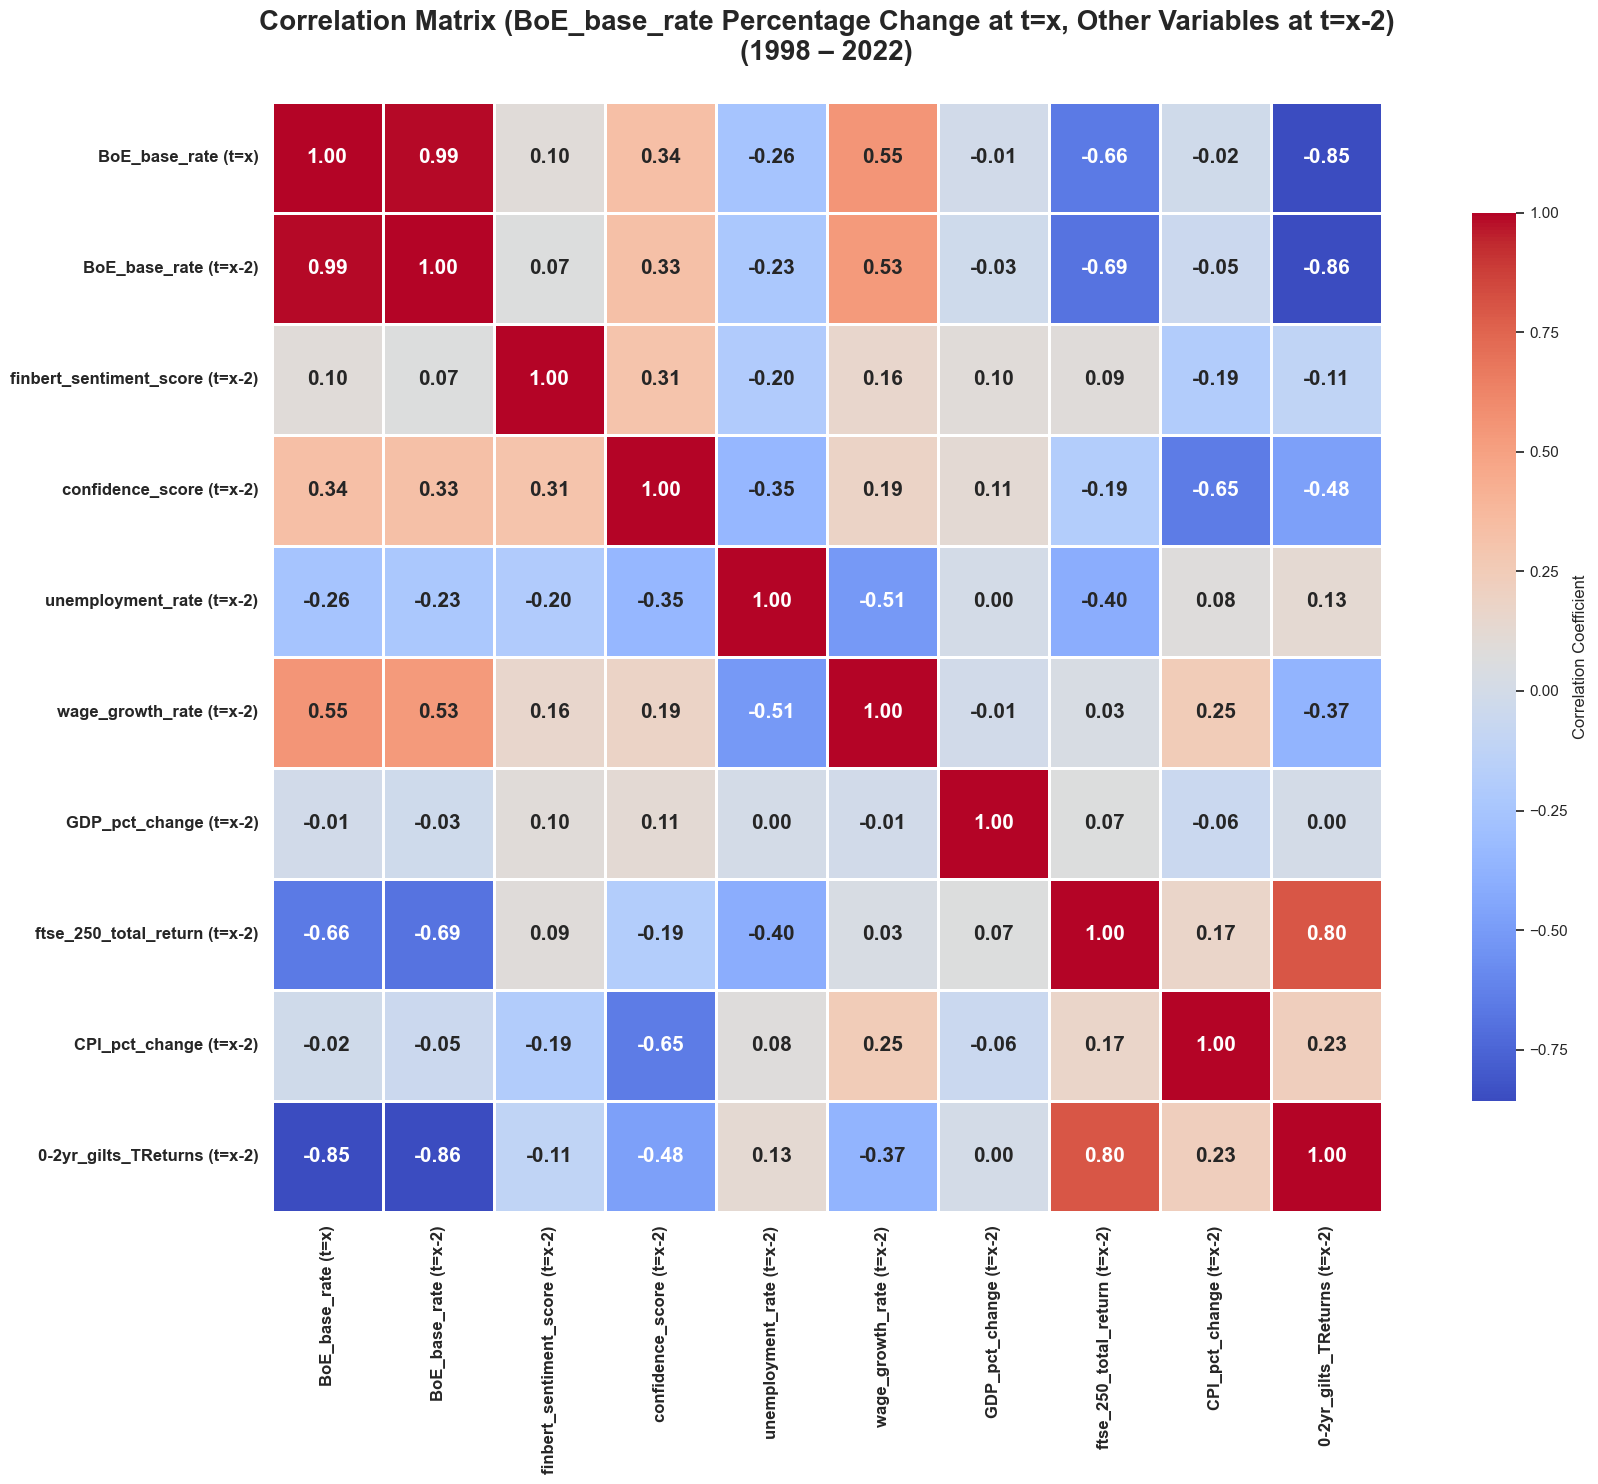

In [14]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/1998 – 12/2022
start_date = "1998-01-01"
end_date = "2022-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'BoE_base_rate', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'CPI_pct_change', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['BoE_base_rate']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'BoE_base_rate': 'BoE_base_rate (t=x)'}, inplace=True)

# Add t+2 (2 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-2)"] = filtered_df[col].shift(2)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (BoE_base_rate Percentage Change at t=x, Other Variables at t=x-2)\n(1998 – 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

### Key Observations:
### BoE_base_rate (t) vs. Economic Indicators at t−2:
### wage_growth_rate	+0.55	Strong positive → Wage growth two periods earlier is a leading indicator of rate hikes.
### 2-yr_gilts_TRReturns	−0.85	Strong negative → Falling gilt returns predict rising rates (yields spike ahead of policy).
### ftse_250_total_return	−0.66	Equities drop two periods before rate increases — likely due to expectations.
### confidence_score	+0.34	Rising confidence precedes BoE rate hikes.
### unemployment_rate	−0.26	Declining unemployment may trigger rate increases, even with a 2-period lag.

## ❌ Weak or Non-Predictive Variables (t=x−2):
### GDP_pct_change	−0.01	No signal.
### CPI_pct_change	−0.02	Surprisingly weak again — may be due to noisy or delayed response.
### finbert_sentiment_score	+0.10	Still weak even with a lag. Could be non-linear or time-averaged.

### Strongest predictors (t=x−2):

### - wage_growth_rate

### - 2-yr_gilts_TRReturns

### - ftse_250_total_return

### - confidence_score

### - unemployment_rate

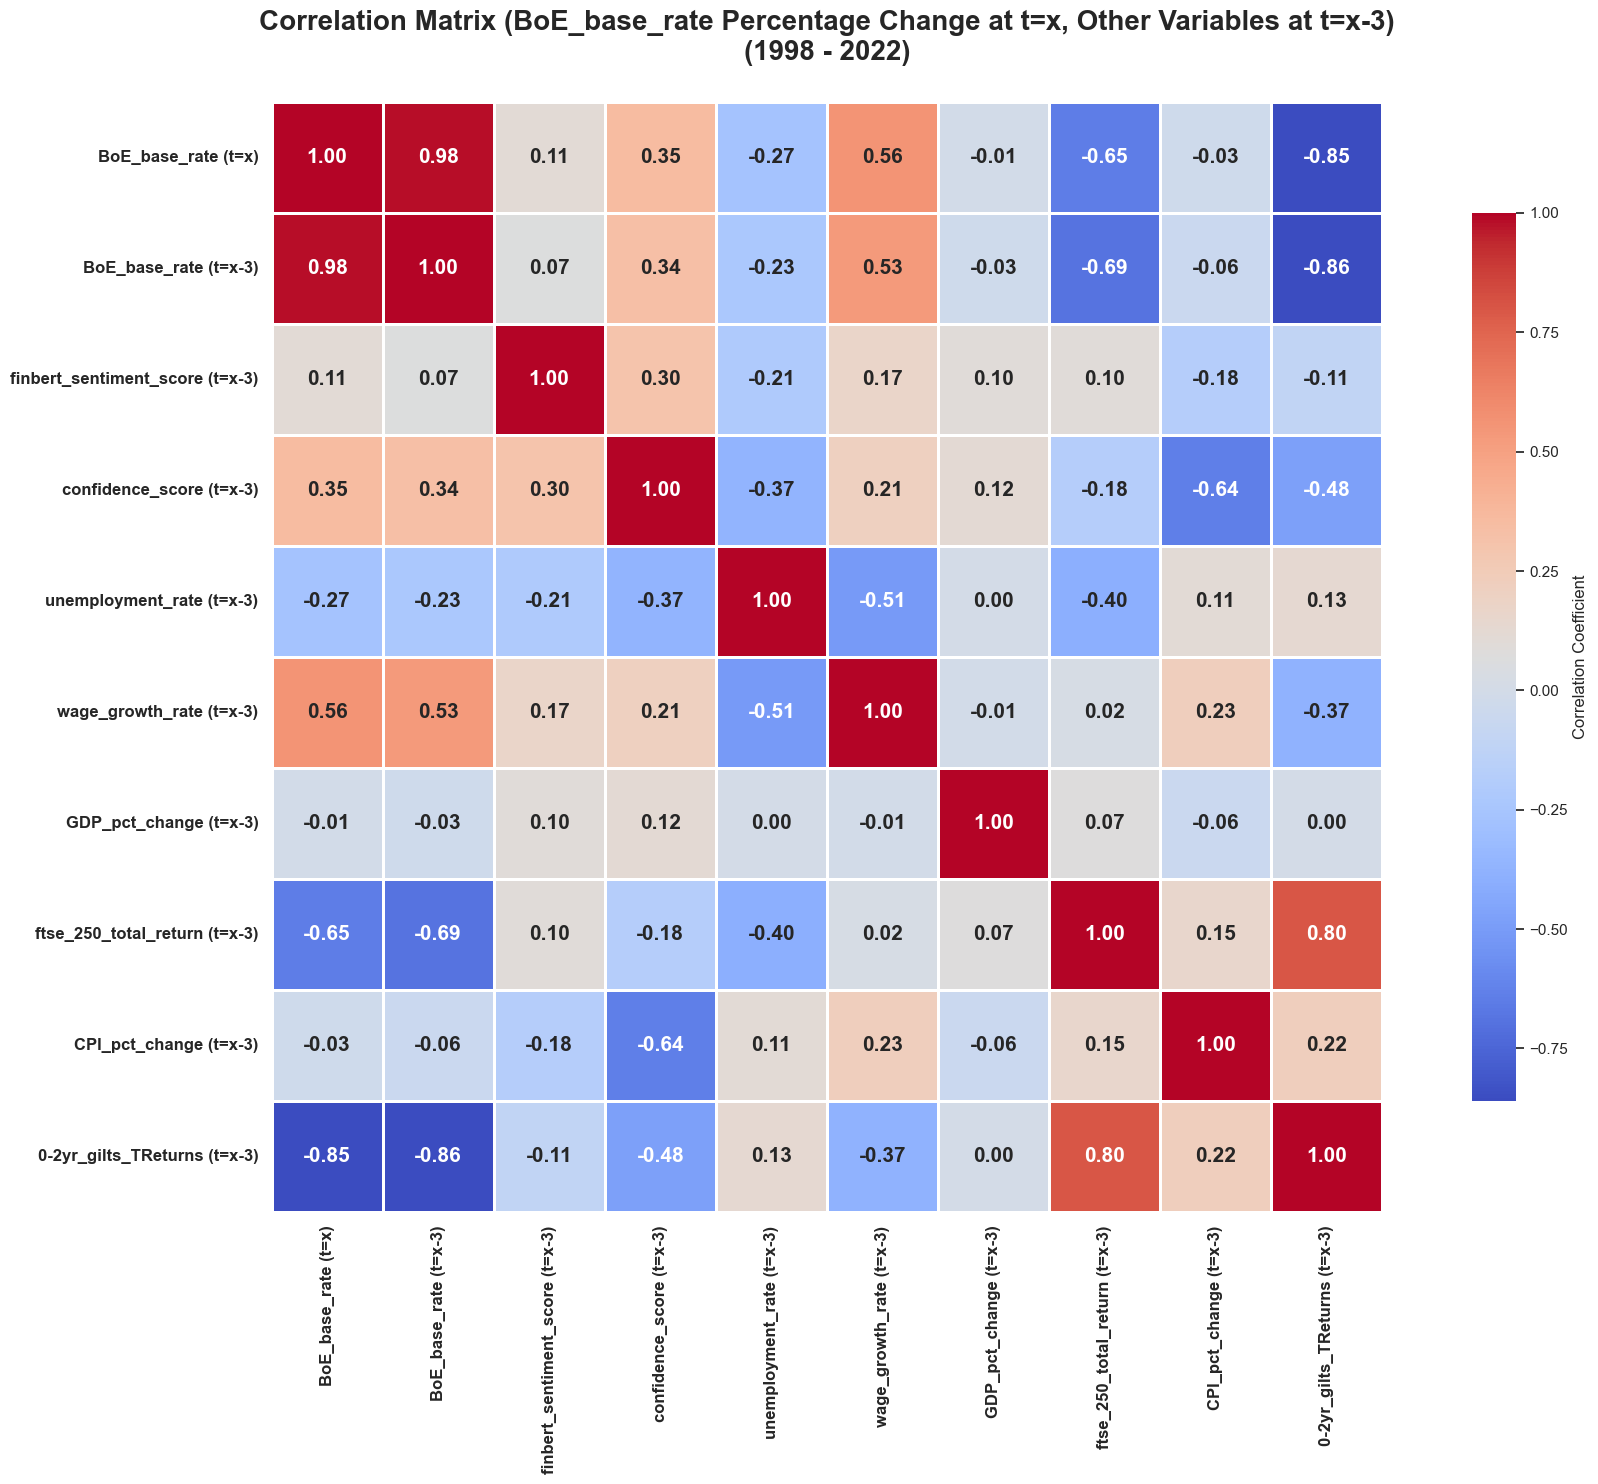

In [15]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "1998-01-01"
end_date = "2022-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'BoE_base_rate', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'CPI_pct_change', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['BoE_base_rate']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'BoE_base_rate': 'BoE_base_rate (t=x)'}, inplace=True)

# Add t+3 (3 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-3)"] = filtered_df[col].shift(3)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (BoE_base_rate Percentage Change at t=x, Other Variables at t=x-3)\n(1998 - 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


### Key Insights:
### BoE_base_rate (t) vs. Variables at t−3:
* wage_growth_rate	+0.56	Still a strong leading indicator — high wage growth precedes rate hikes.
* confidence_score	+0.35	Economic confidence continues to signal future rate increases.
* 2-yr_gilts_TRReturns	−0.85	Most consistent and strong inverse predictor — rising yields signal BoE tightening.
* ftse_250_total_return	−0.65	Equity declines continue to signal tighter monetary policy.
* unemployment_rate	−0.27	Negative correlation holds, indicating tightening labor market as a rate signal.
  
### Weak or No Predictive Value at t−3:

* GDP_pct_change	−0.01	Still shows no signal — not a reliable lead indicator.
* CPI_pct_change	−0.03	Persistently weak — may reflect BoE’s anticipatory stance.
* finbert_sentiment_score	+0.11	Still low — FinBERT may capture shorter-term sentiment shifts better.

### From the above matrices, the variables that best correlate with BoE_base_rate at t=0 are BoE_base_rate at (t=x-1), 2-yr_gilts_TRReturns (t−1), wage_growth_rate (t−1),CPI_pct_change (t=x-1), confidence_score (t=x-1)

### Therefore these will be used for an initial Multiple Linear Regression analysis to assess predictive ability

### Dependent variable:

BoE_base_rate_change (t)

### Independent variables:

- BoE_base_rate at (t=x-1)
- 2-yr_gilts_TRReturns (t−1)
- wage_growth_rate (t−1)
- CPI_pct_change (t=x-1)
- confidence_score (t=x-1)


# Multiple linear regression: BoE_base_rate_change (t) vs BoE_base_rate at (t=x-1), 2-yr_gilts_TRReturns (t−1), wage_growth_rate (t−1),CPI_pct_change (t=x-1), confidence_score (t=x-1)

### Prepare regression dataframe

In [16]:
df_uk_focused.head()

,Date,BoE_base_rate,finbert_sentiment_score,confidence_score,unemployment_rate,wage_growth_rate,GDP_pct_change,ftse_250_total_return,CPI_pct_change,0-2yr_gilts_TReturns
97,1998-01-01,7.321429,NaN,4.0,6.4,NaN,0.7,2060.850098,1.5,NaN
98,1998-02-01,7.357143,NaN,4.0,6.4,NaN,0.7,2206.389893,1.6,NaN
99,1998-03-01,7.392857,NaN,2.0,6.3,NaN,0.6,2353.889893,1.7,NaN
100,1998-04-01,7.428571,NaN,4.0,6.3,NaN,0.6,2397.669922,1.8,NaN
101,1998-05-01,7.464286,NaN,7.0,6.3,NaN,0.6,2525.439941,2.0,NaN


In [18]:
# Step 1: Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

start_date = "1998-01-01"
end_date = "2022-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Step 2: Create new DataFrame for regression
regression_df = pd.DataFrame()
regression_df['Date'] = filtered_df['Date']  
regression_df['BoE_base_rate (t=x)'] = filtered_df['BoE_base_rate']
regression_df['BoE_base_rate(t=x-1)'] = filtered_df['BoE_base_rate'].shift(1)
regression_df['wage_growth_rate (t=x-1)'] = filtered_df['wage_growth_rate']
regression_df['2-yr_gilts_TRReturns (t=x-1)'] = filtered_df['0-2yr_gilts_TReturns']
regression_df['CPI_pct_change (t=x-1)'] = filtered_df['CPI_pct_change'].shift(3)
regression_df['confidence_score (t=x-1)'] = filtered_df['confidence_score'].shift(3)


# Step 3: Drop rows with missing values due to shifting
regression_df.dropna(inplace=True)

# Step 4: View correlation or run regression
correlation_matrix = regression_df.drop(columns='Date').corr()
display(correlation_matrix)

,BoE_base_rate (t=x),BoE_base_rate(t=x-1),wage_growth_rate (t=x-1),2-yr_gilts_TRReturns (t=x-1),CPI_pct_change (t=x-1),confidence_score (t=x-1)
BoE_base_rate (t=x),1.000000,0.997230,0.530733,-0.850672,-0.042648,0.368851
BoE_base_rate(t=x-1),0.997230,1.000000,0.511484,-0.853363,-0.056162,0.366048
wage_growth_rate (t=x-1),0.530733,0.511484,1.000000,-0.348936,0.133251,0.224768
2-yr_gilts_TRReturns (t=x-1),-0.850672,-0.853363,-0.348936,1.000000,0.243509,-0.498975
CPI_pct_change (t=x-1),-0.042648,-0.056162,0.133251,0.243509,1.000000,-0.646076
confidence_score (t=x-1),0.368851,0.366048,0.224768,-0.498975,-0.646076,1.000000


In [22]:
# Define the dependent variable
y = regression_df['BoE_base_rate (t=x)']

# Define the independent variable(s)
X = regression_df[
    ['BoE_base_rate(t=x-1)','wage_growth_rate (t=x-1)',	'2-yr_gilts_TRReturns (t=x-1)',	'CPI_pct_change (t=x-1)','confidence_score (t=x-1)']]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [23]:
# Call the predictions for X (array).
mlr.predict(X)

array([5.72909038e+00, 5.63036841e+00, 5.46925828e+00, 5.24369131e+00,
       5.15707182e+00, 5.09510966e+00, 5.01222056e+00, 4.75606680e+00,
       4.50881171e+00, 3.99890039e+00, 3.95765596e+00, 3.92009083e+00,
       3.91273099e+00, 3.92956067e+00, 3.91532115e+00, 3.90344852e+00,
       3.88880408e+00, 3.85610580e+00, 3.82841910e+00, 3.80669432e+00,
       3.78527376e+00, 3.76876425e+00, 3.74680569e+00, 3.72773065e+00,
       3.71542955e+00, 3.66381146e+00, 3.61411072e+00, 3.54423890e+00,
       3.50731877e+00, 3.46712639e+00, 3.53475283e+00, 3.61391887e+00,
       3.67614002e+00, 3.74115707e+00, 3.84740621e+00, 3.91076215e+00,
       3.98852647e+00, 4.05963710e+00, 4.14197254e+00, 4.21592686e+00,
       4.45718157e+00, 4.58812401e+00, 4.70524189e+00, 4.68453314e+00,
       4.65523194e+00, 4.62605223e+00, 4.60851428e+00, 4.61266643e+00,
       4.59766187e+00, 4.58805178e+00, 4.55907304e+00, 4.55172258e+00,
       4.53108244e+00, 4.51269627e+00, 4.49448394e+00, 4.52297522e+00,
      

In [24]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.9953173452433414
Intercept:  0.11601768324964445
Coefficients:


[('BoE_base_rate(t=x-1)', np.float64(0.9655673234265678)),
 ('wage_growth_rate (t=x-1)', np.float64(0.026077022300163972)),
 ('2-yr_gilts_TRReturns (t=x-1)', np.float64(-0.000982578550784964)),
 ('CPI_pct_change (t=x-1)', np.float64(0.027593753738649897)),
 ('confidence_score (t=x-1)', np.float64(0.0028488735522019396))]

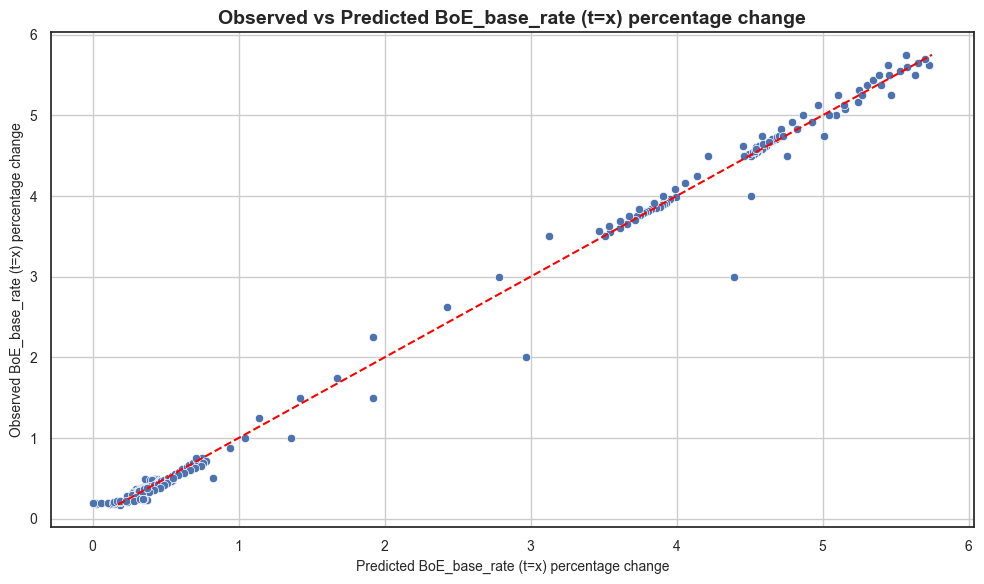

In [25]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['BoE_base_rate (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted BoE_base_rate (t=x) percentage change', fontsize=10)
plt.ylabel('Observed BoE_base_rate (t=x) percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted BoE_base_rate (t=x) percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

### 1. General Fit Looks Strong
Most points are clustered around the red diagonal line, especially in the 3.5–5.5 range → good predictions for high base rate changes.

### 2. Model Predicts Large Hikes Well
When predicted changes are above ~3%, the model aligns closely with observed values.

Indicates good performance during inflationary periods or tightening cycles (e.g., 2022–2023 BoE hikes).

### 3. Some Over- and Under-Prediction
A few scattered points above and below the diagonal indicate some error in medium-range predictions (e.g., predicted ~2–3 but actual varies).

Points near (0, 0) are clustered and tightly grouped, which suggests good performance for low/no rate change periods too.

### 4. Outliers or Noise
A few points (bottom-left, left of zero) indicate either:

Mild overfitting (e.g., predicting a decrease when none occurred).

Unusual macroeconomic shocks the model couldn’t capture well.

## Conclusion:
### The model demonstrates strong predictive power across a range of rate changes.

It performs especially well during high-volatility periods, which is critical in monetary policy modeling.

Remaining discrepancies could be addressed by:

Including interaction terms or nonlinear effects.

Tuning for outlier robustness.



### Training and testing subsets with MLR

In [26]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [27]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model1.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model1.summary()

# Print the summary.
print(print_model)  

                             OLS Regression Results                            
Dep. Variable:     BoE_base_rate (t=x)   R-squared:                       0.995
Model:                             OLS   Adj. R-squared:                  0.994
Method:                  Least Squares   F-statistic:                     7469.
Date:                 Mon, 19 May 2025   Prob (F-statistic):          1.10e-230
Time:                         23:10:52   Log-Likelihood:                 105.11
No. Observations:                  212   AIC:                            -198.2
Df Residuals:                      206   BIC:                            -178.1
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const 

### <span style="color: orange;">R-squared: 0.995 

Model Fit Statistics
R-squared: 0.995 – The model explains 99.5% of the variance in the BoE base rate at time 
𝑡
t. This indicates an excellent fit.

Adjusted R-squared: 0.994 – Still very high, suggesting that the predictors meaningfully contribute.

F-statistic: 7469, p-value: 1.10e-230 – The overall model is statistically significant.

 Coefficient Insights
Variable	Coef	P-value	Significant?	Interpretation
BoE_base_rate(t=x-1)	0.9622	0.000		Strong persistence: Current base rate is heavily influenced by its previous value.
wage_growth_rate (t=x-1)	0.0251	0.001		Statistically significant. Positive effect on base rate – likely reflects BoE's reaction to inflationary wage pressure.
2-yr_gilts_TRReturns (t=x-1)	-0.0013	0.246		Not significant. Weak and uncertain relationship.
CPI_pct_change (t=x-1)	0.0303	0.001		Significant and positive – consistent with inflation-targeting behavior.
confidence_score (t=x-1)	0.0035	0.008		Significant. Slight positive effect – suggests sentiment plays a small role.

Potential Concerns
Condition Number (3.26e+03): High. This suggests possible multicollinearity. You might want to:

Check VIF (Variance Inflation Factor) for each predictor.

Consider removing or combining correlated predictors.

Skewness and Kurtosis: Large values and significant Jarque-Bera test suggest non-normality in residuals.

 Recommendations
Run a VIF test to check multicollinearity.

Consider transforming variables or checking residual plots for:

Non-linearity

Heteroskedasticity

Possibly reduce the model to only significant predictors.


In [28]:
# Run regression on the training subset
# Specify the model
mlr = LinearRegression()  

# Fit the model.
mlr.fit(x_train, y_train)

LinearRegression()

In [29]:
# Call the predictions for X in the train set.
y_pred_train = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train)) 

Prediction for test set: [ 3.03321364e-01  1.20990729e-01  3.83606497e+00  4.52195193e+00
  2.59409296e-01  5.44148614e+00  3.25309451e-01  4.57731167e-01
  2.69425244e-01  5.48308102e-01  3.18187209e-01  4.86186675e+00
  1.29315239e-01  4.52242197e+00  4.90911231e+00  1.91395337e+00
  4.14262515e+00  3.25674259e-01  2.79851739e-01  9.13175255e-02
  3.80940452e-01  4.48634033e-01  4.64038054e-01  5.34326522e-01
  4.25143619e-01  3.01645895e-01  6.63478846e-01  3.04614979e-01
  4.36926145e+00  2.58262444e-01  4.82816385e-01  3.22971523e-01
  4.95961098e+00  5.47019381e+00  5.56359979e+00  1.13105370e+00
  4.83419745e-01  3.36048724e-01  1.27468349e-01  3.10209882e-01
  4.87558839e-01  5.37556925e+00  3.17549487e-01  3.47134171e+00
  5.17202382e-01  2.52960346e-01  4.72117689e-01  5.20577602e-01
  5.09915646e+00  4.53179545e+00  3.27002015e-01  3.22955882e-01
  3.39429574e-01  4.69754780e+00  3.25523201e-01  5.03121816e+00
  1.46324338e-01  3.07991601e-01  3.61813632e+00  3.91839038e+00


In [30]:
# Call the predictions for x in the test set.
y_pred_train = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train))  

Prediction for test set: [0.25750953 0.43655125 0.81683355 3.71967538 4.00410275 0.32822462
 0.70986277 4.61978393 0.26530526 0.47819019 1.03638768 0.29597125
 0.44300001 5.33664707 0.75183746 0.22661784 0.29549694 0.40115289
 0.46698061 0.45511853 4.58210314 5.01940219 3.53836575 0.66008363
 0.00619161 5.13197847 4.71444447 0.2871359  0.34595473 0.28282856
 3.81335219 4.78840885 0.44780215 0.38786099 0.30572925 5.38826085
 0.75426814 3.91182664 4.60321066 0.04301339 0.14448382 3.74328068
 0.34177907 5.69252135 0.2085991  3.8971836  3.9602631  0.32412134
 5.56721937 0.410243   2.77221754 3.66752124 5.64671539]


In [31]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100) 

99.81649416766582


### <span style="color: orange;"> R-square of 99.81%

Your model generalizes extremely well to unseen data.

It explains nearly all the variability in the BoE base rate even on the test set, which is rare and impressive.

### Check for multicollinearity

In [32]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))



   VIF Factor                      features
0       356.5                         const
1         5.3          BoE_base_rate(t=x-1)
2         1.5      wage_growth_rate (t=x-1)
3         5.1  2-yr_gilts_TRReturns (t=x-1)
4         2.1        CPI_pct_change (t=x-1)
5         2.5      confidence_score (t=x-1)


### <span style="color: orange;"> Observations from the VIF output:

BoE_base_rate(t=x-1)	5.3	 Moderate multicollinearity

wage_growth_rate (t=x-1)	1.5	 No concern

2-yr_gilts_TRReturns	5.1	 Moderate multicollinearity

CPI_pct_change (t=x-1)	2.1	 Low concern

confidence_score (t=x-1)	2.5	 Low concern

### Check for heteroscedasticity

In [33]:
# Determine heteroscedasticity.
model2 = sms.het_breuschpagan(model1.resid, model1.model.exog) 

In [34]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': np.float64(21.60641598637631), 'LM Test p-value': np.float64(0.0006219116955703772), 'F-stat': np.float64(4.675495465094064), 'F-test p-value': np.float64(0.0004585361346886324)}


LM statistic	21.61	—
LM p-value	0.00062	Reject H: Evidence of heteroskedasticity
F-statistic	4.68	—
F-test p-value	0.00046	Reject H: Confirms heteroskedasticity

 ### Conclusion
### There is statistically significant heteroskedasticity in your residuals.

This violates one of the key OLS assumptions (constant variance of errors), which may affect:

Validity of standard errors ( t-tests, p-values become unreliable)

Confidence intervals

### Check normality of regression residuals - assumption of MLR

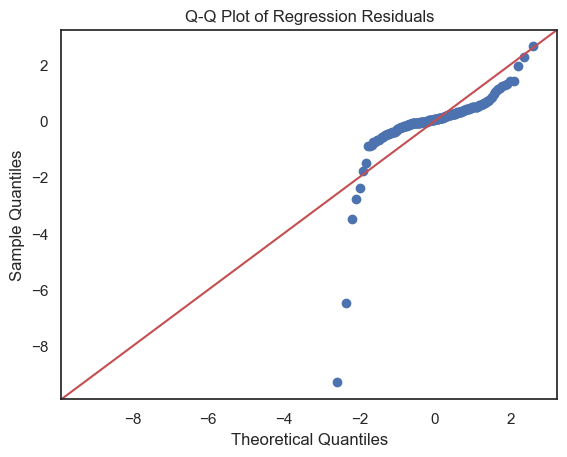

In [35]:
# Q-Q plot of residuals
sm.qqplot(model1.resid, line='45', fit=True)
plt.title("Q-Q Plot of Regression Residuals")
plt.show()

### Your residuals are not normally distributed.

### This reinforces what we saw earlier from:

### Jarque-Bera test (p = 0.00)

### Breusch-Pagan test (heteroskedasticity present)


## Evaluate the model

In [36]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 0.05607682457096853
Mean Square Error (Final): 0.007842352823129556


### <span style="color: orange;">  Mean Absolute Error (MAE) ~0.0561	On average, predictions are off by ~0.056 percentage points.
### <span style="color: orange;"> Mean Squared Error (MSE)	~0.0078	Small squared error — large errors are rare.


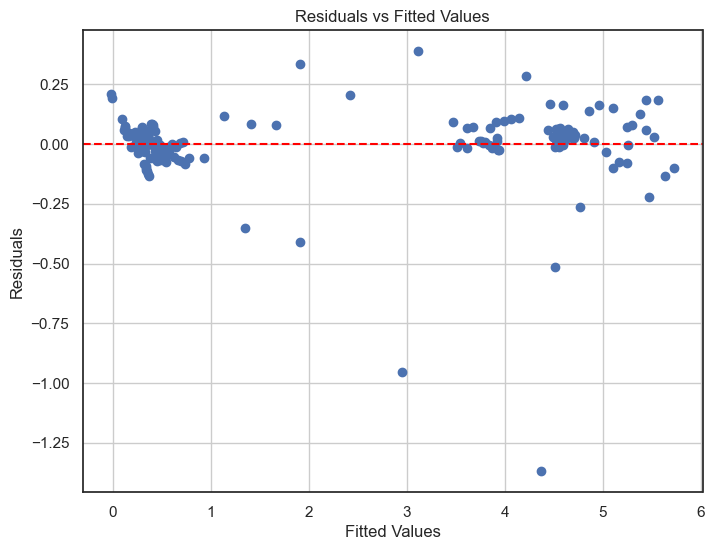

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(model1.fittedvalues, model1.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()

### Interpretation:

Violates the OLS assumption of homoscedasticity (equal variance).

Indicates potential model mis-specification, non-linearity, or missing variables.

Combined with earlier diagnostics (Breusch-Pagan test, Q-Q plot), this reinforces the need for correction.


## Multiple linear regression: Drop 2-yr_gilts_TRReturns (t=x-1) as p value is greater than 0.05


In [38]:
regression_df.head()

,Date,BoE_base_rate (t=x),BoE_base_rate(t=x-1),wage_growth_rate (t=x-1),2-yr_gilts_TRReturns (t=x-1),CPI_pct_change (t=x-1),confidence_score (t=x-1)
136,2001-03-01,5.625000,5.750000,6.1,119.314,0.8,-1.0
137,2001-04-01,5.500000,5.625000,6.2,119.809,0.9,5.0
138,2001-05-01,5.250000,5.500000,5.1,120.240,0.8,2.0
139,2001-06-01,5.166667,5.250000,5.5,120.458,0.9,3.0
140,2001-07-01,5.083333,5.166667,5.2,121.387,1.2,1.0


In [39]:
# Define the dependent variable
y = regression_df['BoE_base_rate (t=x)']

# Define the independent variable(s)
X = regression_df[
    ['BoE_base_rate(t=x-1)','wage_growth_rate (t=x-1)','CPI_pct_change (t=x-1)','confidence_score (t=x-1)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [40]:
# Call the predictions for X (array).
mlr.predict(X)

array([5.71462092e+00, 5.61678789e+00, 5.45565461e+00, 5.22773672e+00,
       5.14081419e+00, 5.07854464e+00, 4.99751568e+00, 4.73961547e+00,
       4.48913617e+00, 3.97551630e+00, 3.93414631e+00, 3.89866989e+00,
       3.89175004e+00, 3.91081107e+00, 3.89619263e+00, 3.88357492e+00,
       3.87028438e+00, 3.83938250e+00, 3.81285946e+00, 3.78995347e+00,
       3.76857107e+00, 3.75365721e+00, 3.73122646e+00, 3.71336138e+00,
       3.69846527e+00, 3.64717318e+00, 3.59503032e+00, 3.52564463e+00,
       3.48995429e+00, 3.44979612e+00, 3.51841717e+00, 3.59769690e+00,
       3.65994027e+00, 3.72579880e+00, 3.83176729e+00, 3.89593971e+00,
       3.97533647e+00, 4.05014982e+00, 4.13231798e+00, 4.20753348e+00,
       4.45182379e+00, 4.58429565e+00, 4.70249367e+00, 4.68247802e+00,
       4.65323131e+00, 4.62379591e+00, 4.60682233e+00, 4.61069786e+00,
       4.59638895e+00, 4.58845773e+00, 4.56025238e+00, 4.55337138e+00,
       4.53240523e+00, 4.51391506e+00, 4.49494963e+00, 4.52457374e+00,
      

In [41]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.9952928297503557
Intercept:  -0.057997033678217624
Coefficients:


[('BoE_base_rate(t=x-1)', np.float64(0.9745054476588723)),
 ('wage_growth_rate (t=x-1)', np.float64(0.024759702933468644)),
 ('CPI_pct_change (t=x-1)', np.float64(0.026646697679703672)),
 ('confidence_score (t=x-1)', np.float64(0.0031399188566858943))]

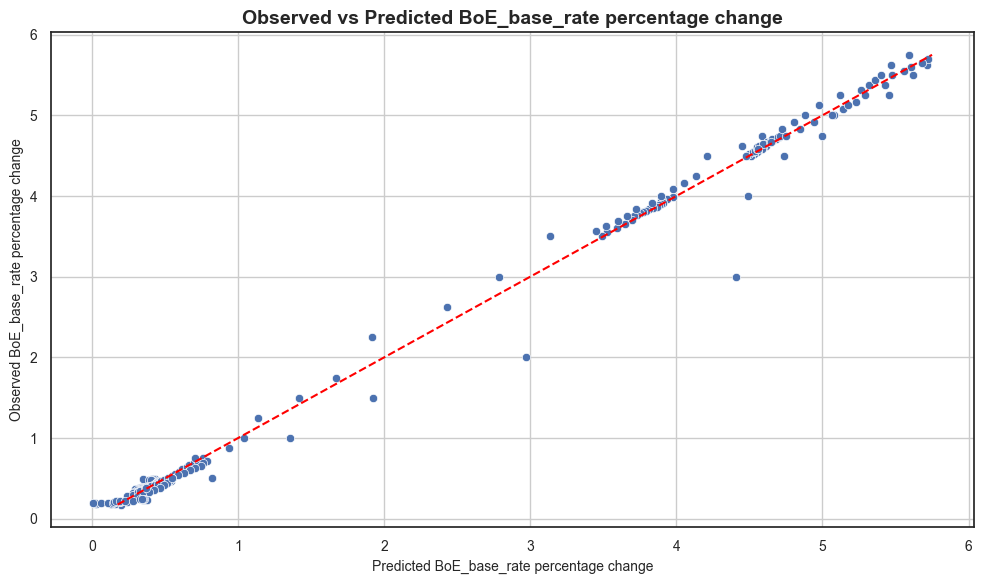

In [42]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['BoE_base_rate (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted BoE_base_rate percentage change', fontsize=10)
plt.ylabel('Observed BoE_base_rate percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted BoE_base_rate percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

### Training and testing subsets with MLR

In [43]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [44]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model3 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model3.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model3.summary()

# Print the summary.
print(print_model)  

                             OLS Regression Results                            
Dep. Variable:     BoE_base_rate (t=x)   R-squared:                       0.994
Model:                             OLS   Adj. R-squared:                  0.994
Method:                  Least Squares   F-statistic:                     9320.
Date:                 Mon, 19 May 2025   Prob (F-statistic):          2.10e-232
Time:                         23:51:20   Log-Likelihood:                 104.42
No. Observations:                  212   AIC:                            -198.8
Df Residuals:                      207   BIC:                            -182.1
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

### R-squared	0.994	99.4% variance explained – still excellent
### F-statistic	9320	Model is highly statistically significant
### Durbin-Watson	2.013	No strong autocorrelation detected
### Jarque-Bera p-value	0.00	Residuals are still not normally distributed
### AIC/BIC	↓ -198.8 / -182.1	Slight improvement vs. previous (-198.2 / -178.1)

### Significant Predictors 
- BoE_base_rate(t=x-1)	0.9738	0.000		Strong persistence, nearly 1-for-1
- wage_growth_rate	0.0236	0.001		Positive inflationary influence
- CPI_pct_change	0.0291	0.001		Significant price-level effect
- confidence_score	0.0039	0.003		Small but significant influence.

In [45]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                  features
0         6.4                     const
1         1.5      BoE_base_rate(t=x-1)
2         1.4  wage_growth_rate (t=x-1)
3         2.1    CPI_pct_change (t=x-1)
4         2.3  confidence_score (t=x-1)


### No multicollinearity observed from the VIF output

In [46]:
# Determine heteroscedasticity.
model4 = sms.het_breuschpagan(model3.resid, model3.model.exog)

In [47]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': np.float64(21.60641598637631), 'LM Test p-value': np.float64(0.0006219116955703772), 'F-stat': np.float64(4.675495465094064), 'F-test p-value': np.float64(0.0004585361346886324)}


Despite improving the model structure:

### Heteroskedasticity persists.

This violates OLS assumptions and affects inference validity (e.g. t-stats and p-values might be misleading).

# Given the model output above, multiple linear regression is likely a good ML model to describe BoE Base Rate. We will explore Random Forest / XGBoost next

In [48]:
regression_df.describe()

,Date,BoE_base_rate (t=x),BoE_base_rate(t=x-1),wage_growth_rate (t=x-1),2-yr_gilts_TRReturns (t=x-1),CPI_pct_change (t=x-1),confidence_score (t=x-1)
count,265,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,2012-02-02 01:21:30.566037760,1.908436,1.916927,3.094340,169.676423,2.276981,-12.392453
min,2001-03-01 00:00:00,0.175000,0.175000,-2.900000,119.314000,-0.100000,-49.000000
25%,2006-09-01 00:00:00,0.339888,0.339888,1.900000,151.678000,1.300000,-22.000000
50%,2012-03-01 00:00:00,0.483146,0.483146,2.900000,181.954000,2.000000,-9.000000
75%,2017-07-01 00:00:00,3.983333,4.000000,4.400000,186.137000,2.800000,-3.000000
max,2022-12-01 00:00:00,5.750000,5.750000,8.900000,189.413000,10.100000,7.000000
std,NaN,2.011851,2.023308,1.804982,21.788040,1.650585,12.324401


In [49]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 136 to 400
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          265 non-null    datetime64[ns]
 1   BoE_base_rate (t=x)           265 non-null    float64       
 2   BoE_base_rate(t=x-1)          265 non-null    float64       
 3   wage_growth_rate (t=x-1)      265 non-null    float64       
 4   2-yr_gilts_TRReturns (t=x-1)  265 non-null    float64       
 5   CPI_pct_change (t=x-1)        265 non-null    float64       
 6   confidence_score (t=x-1)      265 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 16.6 KB


In [50]:
regression_df.head()   

,Date,BoE_base_rate (t=x),BoE_base_rate(t=x-1),wage_growth_rate (t=x-1),2-yr_gilts_TRReturns (t=x-1),CPI_pct_change (t=x-1),confidence_score (t=x-1)
136,2001-03-01,5.625000,5.750000,6.1,119.314,0.8,-1.0
137,2001-04-01,5.500000,5.625000,6.2,119.809,0.9,5.0
138,2001-05-01,5.250000,5.500000,5.1,120.240,0.8,2.0
139,2001-06-01,5.166667,5.250000,5.5,120.458,0.9,3.0
140,2001-07-01,5.083333,5.166667,5.2,121.387,1.2,1.0


Root Mean Squared Error: 0.1097
Mean Squared Error: 0.0120
Mean Absolute Error: 0.0647
R² Score: 0.9971


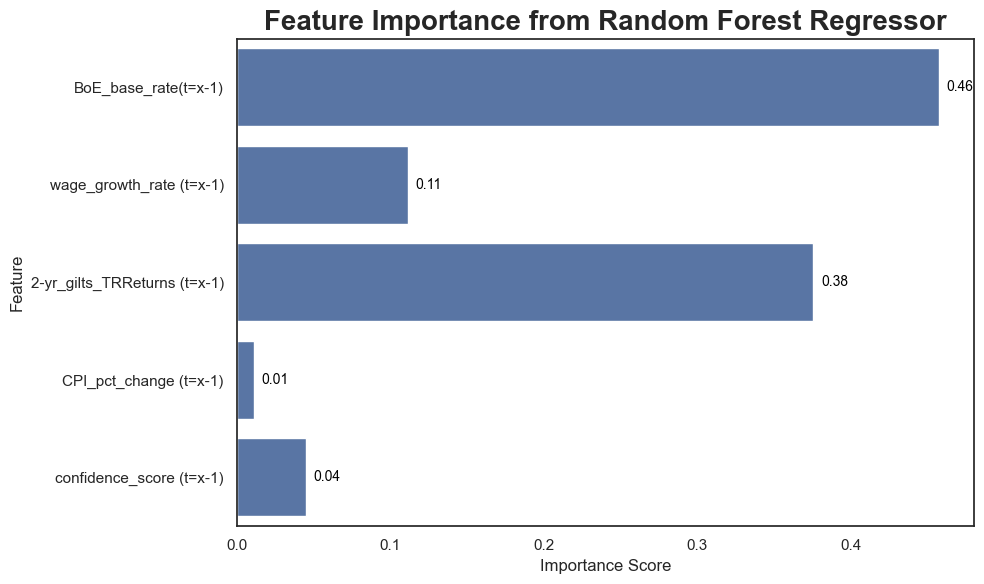

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas

# 1. Prepare the data
# -------------------
# Use only non-null rows
regression_df = regression_df.dropna(
    subset=['BoE_base_rate (t=x)',	'BoE_base_rate(t=x-1)',	'wage_growth_rate (t=x-1)',	'2-yr_gilts_TRReturns (t=x-1)',	'CPI_pct_change (t=x-1)','confidence_score (t=x-1)'
       
       
    ]
)

# Define features and target
X = regression_df[
    [
    'BoE_base_rate(t=x-1)',	'wage_growth_rate (t=x-1)',	'2-yr_gilts_TRReturns (t=x-1)',	'CPI_pct_change (t=x-1)','confidence_score (t=x-1)'  
       
    ]
]
y = regression_df['BoE_base_rate (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Build and train the Random Forest model
# ------------------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
)

rf_model.fit(X_train, y_train)

# 4. Predictions and Evaluation
# -----------------------------
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Feature Importance Plot
# --------------------------
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importances, y=feature_importances.index)  # Save the axes object
plt.title(
    "Feature Importance from Random Forest Regressor", fontsize=20, fontweight='bold'
)
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importances, feature_importances.index)):
    ax.text(
        value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10
    )  # Use the saved 'ax'
plt.tight_layout()
plt.show()

### OLS: 2-yr_gilts_TRReturns was not statistically significant (p ≈ 0.25).

### Random Forest: It’s the second most important variable.

This is a great example of:

Linear vs. nonlinear modeling differences — RF can detect complex patterns that OLS misses.

### Model goals divergence:

OLS is for inference (understanding coefficients, p-values).

RF is for prediction (importance = contribution to predictive accuracy).

Root Mean Squared Error: 0.0931
Mean Squared Error: 0.0087
Mean Absolute Error: 0.0435
R² Score: 0.9979


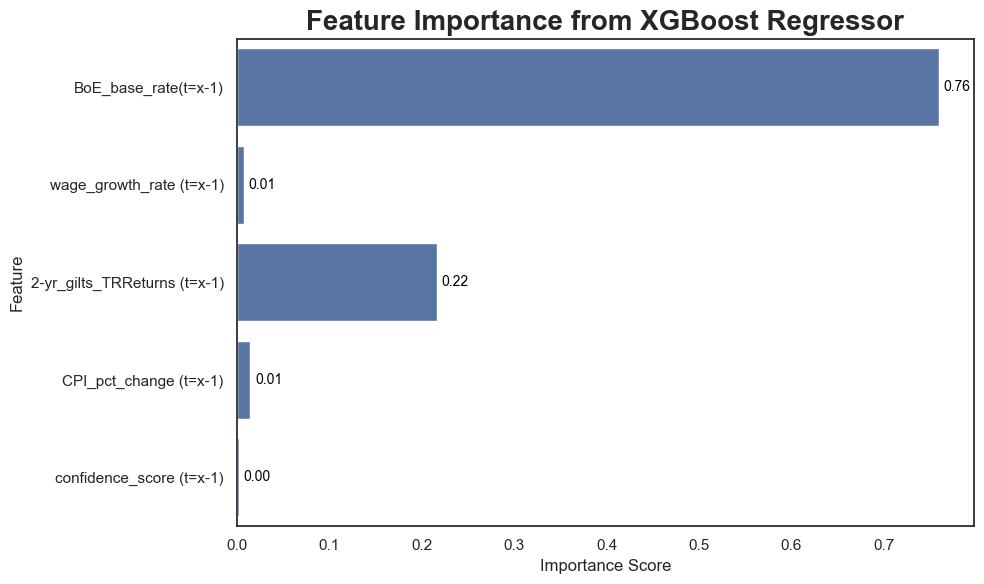

In [54]:
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare the data
# -------------------
# Drop missing values
regression_df = regression_df.dropna(subset=['BoE_base_rate (t=x)',	'BoE_base_rate(t=x-1)',	'wage_growth_rate (t=x-1)',	'2-yr_gilts_TRReturns (t=x-1)',	
                                             'CPI_pct_change (t=x-1)','confidence_score (t=x-1)'

])

# Features and target
X = regression_df[['BoE_base_rate(t=x-1)',	'wage_growth_rate (t=x-1)',	'2-yr_gilts_TRReturns (t=x-1)',	
                                             'CPI_pct_change (t=x-1)','confidence_score (t=x-1)'
    ]]

y = regression_df['BoE_base_rate (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 3. Initialize and train XGBoost model
# -------------------------------------
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',  # use squared error for regression
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 4. Predict and evaluate
# -----------------------
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
# 5. Plot feature importance
# --------------------------
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance, y=feature_importance.index)

plt.title("Feature Importance from XGBoost Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importance, feature_importance.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

### Interpretation:

XGBoost confirms dominance of BoE_base_rate(t=x-1), which aligns with both Random Forest and OLS results.

2-yr_gilts_TRReturns is again quite important — suggesting nonlinear relationships that OLS misses.

Macroeconomic sentiment variables (confidence, wage growth, CPI) contribute very little in XGBoost, implying:

Their impact may be linear or conditional (which tree models may prune out unless interactions exist).

Or they’re more predictive in longer-term models, not immediate base rate changes.

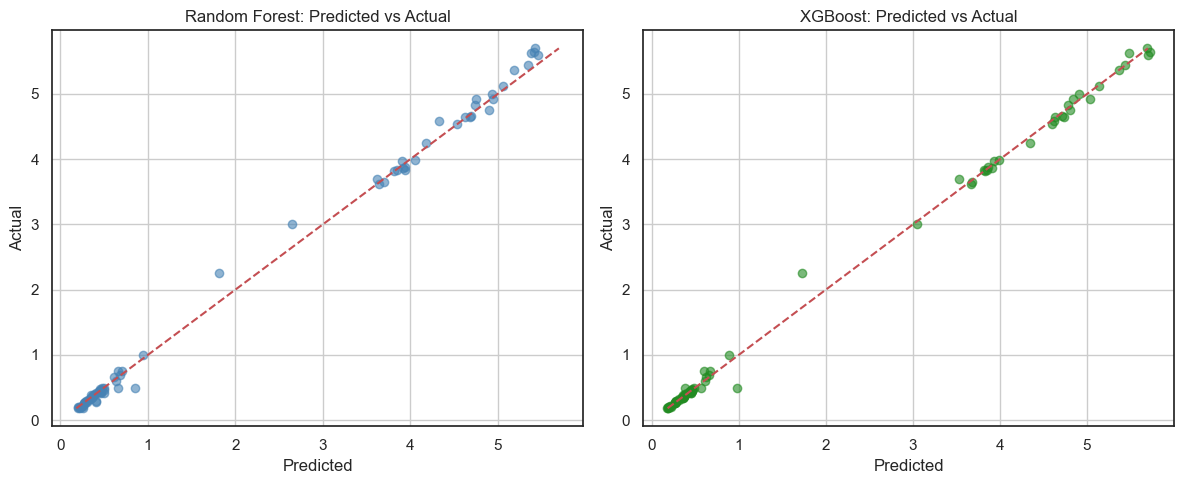

In [55]:
# --- Random Forest Predictions ---
rf_preds = rf_model.predict(X_test)

# --- XGBoost Predictions ---
xgb_preds = xgb_model.predict(X_test)

# --- Plot Predictions vs Actuals ---
plt.figure(figsize=(12, 5))

# Random Forest subplot
plt.subplot(1, 2, 1)
plt.scatter(rf_preds, y_test, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest: Predicted vs Actual")
plt.grid(True)

# XGBoost subplot
plt.subplot(1, 2, 2)
plt.scatter(xgb_preds, y_test, alpha=0.6, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost: Predicted vs Actual")
plt.grid(True)

plt.tight_layout()
plt.show()

### Interpretation

Both models are excellent for predicting BoE base rates.

XGBoost shows slightly higher precision, especially for extreme values and low-end rates.

This complements previous importance analysis showing XGBoost leans heavily on BoE_base_rate(t=x-1).

## Additional changes post initial pitch to BOE

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_28396\3821488098.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'])


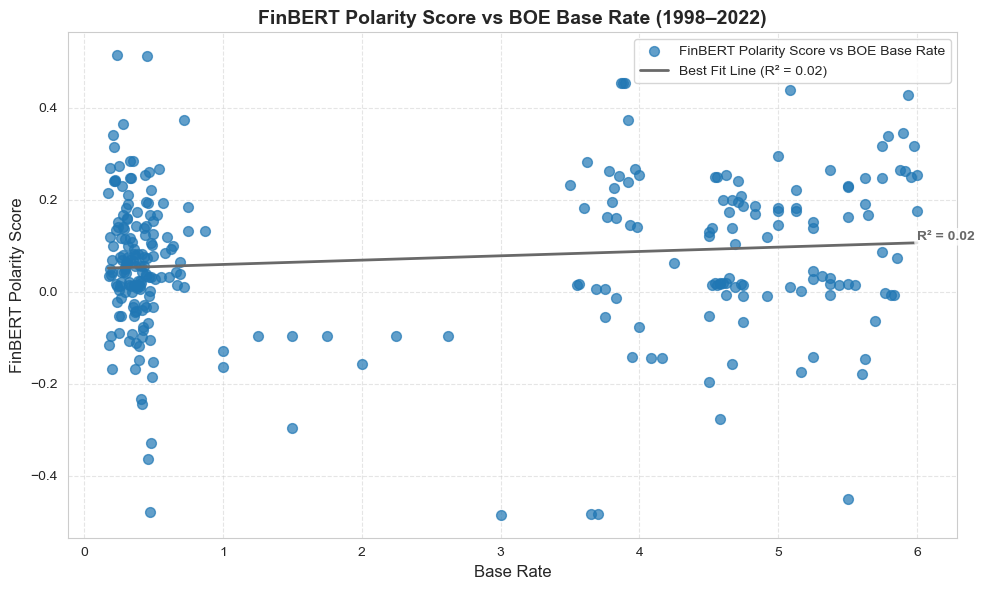

In [10]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Date column is in datetime format
df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'])

# Filter data
start_date = pd.to_datetime('1998-09-01')
end_date = pd.to_datetime('2022-10-31')

df_plot = df_uk_full[
    (df_uk_full['Date'] >= start_date) & (df_uk_full['Date'] <= end_date)
].copy()
df_plot = df_plot.dropna(subset=['base_rate', 'polarity_score_finbert'])

# Proceed only if data is sufficient
if df_plot.empty or len(df_plot) < 2:
    print("Not enough valid data points to create a scatter plot and best-fit line.")
else:
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(figsize=(10, 6))

    # Scatter Plot
    ax.scatter(
        df_plot['base_rate'],
        df_plot['polarity_score_finbert'],
        color='#2077b4',
        alpha=0.7,
        s=50,
        label='FinBERT Polarity Score vs BOE Base Rate'
    )

    # Best-fit line
    x = df_plot['base_rate'].values
    y = df_plot['polarity_score_finbert'].values
    slope, intercept, r_value, _, _ = stats.linregress(x, y)
    r_squared = r_value ** 2

    x_line = np.array([x.min(), x.max()])
    y_line = slope * x_line + intercept
    ax.plot(x_line, y_line, color='dimgray', linewidth=2, label=f'Best Fit Line (R² = {r_squared:.2f})')

    # R² label
    ax.text(x_line.max(), y_line[np.argmax(x_line)],
            f'R² = {r_squared:.2f}',
            color='dimgray', fontsize=10, fontweight='bold',
            ha='left', va='bottom',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2'))

    # Labels and title
    ax.set_xlabel('Base Rate', fontsize=12)
    ax.set_ylabel('FinBERT Polarity Score', fontsize=12)
    ax.set_title('FinBERT Polarity Score vs BOE Base Rate (1998–2022)', fontsize=14, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(loc='best', fontsize=10)
    fig.tight_layout()
    plt.show()

### Prepare new regression dataframe for additional Random Forest and XGBoost models

In [38]:
# Step 1: Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

start_date = "1998-01-01"
end_date = "2022-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Step 2: Create new DataFrame for regression
regression_df = pd.DataFrame()
regression_df['Date'] = filtered_df['Date']  
regression_df['BoE_base_rate (t=x)'] = filtered_df['BoE_base_rate']
regression_df['BoE_base_rate(t=x-1)'] = filtered_df['BoE_base_rate'].shift(1)
regression_df['finbert_sentiment_score(t=x)'] = filtered_df['finbert_sentiment_score']
regression_df['finbert_sentiment_score(t=x-1)'] = filtered_df['finbert_sentiment_score'].shift(1)
regression_df['wage_growth_rate (t=x-1)'] = filtered_df['wage_growth_rate']
regression_df['2-yr_gilts_TRReturns (t=x-1)'] = filtered_df['0-2yr_gilts_TReturns']
regression_df['CPI_pct_change (t=x-1)'] = filtered_df['CPI_pct_change'].shift(3)
regression_df['confidence_score (t=x-1)'] = filtered_df['confidence_score'].shift(3)


# Step 3: Drop rows with missing values due to shifting
regression_df.dropna(inplace=True)

# Step 4: View correlation or run regression
correlation_matrix = regression_df.drop(columns='Date').corr()
display(correlation_matrix)

,BoE_base_rate (t=x),BoE_base_rate(t=x-1),finbert_sentiment_score(t=x),finbert_sentiment_score(t=x-1),wage_growth_rate (t=x-1),2-yr_gilts_TRReturns (t=x-1),CPI_pct_change (t=x-1),confidence_score (t=x-1)
BoE_base_rate (t=x),1.000000,0.997420,0.065449,0.084216,0.529277,-0.858416,-0.073020,0.395605
BoE_base_rate(t=x-1),0.997420,1.000000,0.050272,0.067448,0.512395,-0.858891,-0.078971,0.387392
finbert_sentiment_score(t=x),0.065449,0.050272,1.000000,0.315951,0.157699,-0.111019,-0.254370,0.303378
finbert_sentiment_score(t=x-1),0.084216,0.067448,0.315951,1.000000,0.213253,-0.111123,-0.245599,0.294571
wage_growth_rate (t=x-1),0.529277,0.512395,0.157699,0.213253,1.000000,-0.365826,0.075366,0.274938
2-yr_gilts_TRReturns (t=x-1),-0.858416,-0.858891,-0.111019,-0.111123,-0.365826,1.000000,0.235866,-0.497996
CPI_pct_change (t=x-1),-0.073020,-0.078971,-0.254370,-0.245599,0.075366,0.235866,1.000000,-0.617967
confidence_score (t=x-1),0.395605,0.387392,0.303378,0.294571,0.274938,-0.497996,-0.617967,1.000000
